In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
import tensorflow.keras.layers as tfl
import seaborn as sns
from PIL import Image

monkeypox


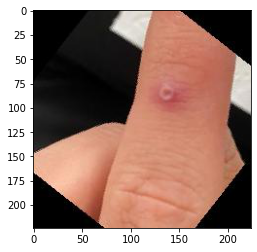

healthy


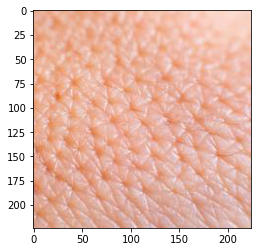

chickenpox


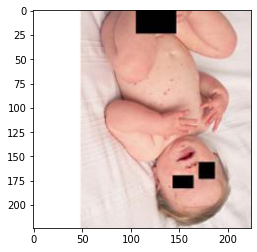

In [3]:
train_images = os.listdir('../input/monkeypox-skin-lesion-classification')
for folder in train_images :
    images = os.listdir('../input/monkeypox-skin-lesion-classification/'+str(folder))
    print(folder)
    img = mpimg.imread('../input/monkeypox-skin-lesion-classification/'+str(folder)+'/'+images[0])
    imgplot = plt.imshow(img)
    plt.show()

In [4]:
train_path = '../input/monkeypox-skin-lesion-classification/monkeypox/'
from os import listdir
from os.path import isfile, join
files = [f for f in listdir(train_path) if isfile(join(train_path, f))]
import PIL
from PIL import Image
img = PIL.Image.open(train_path+str(files[0]))
wid, hgt = img.size
print(str(wid) + "x" + str(hgt))

224x224


In [5]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

In [6]:
Accuracy = {}

EfficientNet V2
* 4 hidden layers = 1024,512,128,64
* img_size = 400x400
* introduced batch normalization and dropout
* Accuracy obtained :

In [7]:
labels = os.listdir('../input/monkeypox-skin-lesion-classification')
img_size = 224
train_dataset = image_dataset_from_directory(
    '../input/monkeypox-skin-lesion-classification',
    image_size = (img_size,img_size),
    batch_size = 32,
    shuffle=True,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.2,
    subset='training',
    seed=22
)
val_dataset = image_dataset_from_directory(
    '../input/monkeypox-skin-lesion-classification',
    image_size = (img_size,img_size),
    batch_size = 32,
    shuffle=False,
    labels='inferred',
    class_names = labels,
    label_mode = 'categorical',
    color_mode='rgb',
    validation_split = 0.2,
    subset='validation',
    seed=22
)
def get_model(base, preprocessor, img_size):    
    inputs = tf.keras.Input(shape=(img_size,img_size,3))
    x = RandomFlip('horizontal')(inputs)
    x = preprocessor(x)
    x = base(x)
    x = tfl.Flatten()(x)
    x = tfl.Dense(1024, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(512, activation='relu')(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(128, activation='relu')(x)
    x = tfl.Dropout(0.15)(x)
    x = tfl.BatchNormalization()(x)
    x = tfl.Dense(64, activation='relu')(x)
    x = tfl.Dropout(0.3)(x)
    x = tfl.BatchNormalization()(x)
    outputs = tfl.Dense(3, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    return model

Found 21026 files belonging to 3 classes.
Using 16821 files for training.


2022-08-31 04:51:45.053884: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Found 21026 files belonging to 3 classes.
Using 4205 files for validation.


In [8]:
preprocess_input = tf.keras.applications.efficientnet.preprocess_input
pre_trained_model = tf.keras.applications.EfficientNetB5(input_shape=(img_size,img_size,3),
                                         include_top=False,
                                         weights='imagenet')
pre_trained_model.trainable = False
model = get_model(pre_trained_model, preprocess_input, img_size)
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=10,
                    verbose=1)

115277824/115263384 [==============================] - 1s 0us/step
Epoch 1/10


2022-08-31 04:52:07.984911: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 23:47 - loss: 1.2722 - accuracy: 0.4688

Cleanup called...


  9/526 [..............................] - ETA: 24:12 - loss: 1.1535 - accuracy: 0.5243

Cleanup called...


 10/526 [..............................] - ETA: 24:04 - loss: 1.1343 - accuracy: 0.5312

Cleanup called...


 12/526 [..............................] - ETA: 23:47 - loss: 1.1299 - accuracy: 0.5391

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 23:40 - loss: 1.0819 - accuracy: 0.5558

Cleanup called...


 15/526 [..............................] - ETA: 23:35 - loss: 1.0608 - accuracy: 0.5625

Cleanup called...


 16/526 [..............................] - ETA: 23:30 - loss: 1.0339 - accuracy: 0.5762

Cleanup called...


 20/526 [>.............................] - ETA: 23:26 - loss: 0.9876 - accuracy: 0.6031

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 23:11 - loss: 0.9670 - accuracy: 0.6155

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 22:57 - loss: 0.9471 - accuracy: 0.6250

Cleanup called...


 29/526 [>.............................] - ETA: 23:02 - loss: 0.9398 - accuracy: 0.6250

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 22:53 - loss: 0.9303 - accuracy: 0.6280

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 22:46 - loss: 0.9217 - accuracy: 0.6326

Cleanup called...


 40/526 [=>............................] - ETA: 22:27 - loss: 0.8789 - accuracy: 0.6492

Cleanup called...


 41/526 [=>............................] - ETA: 22:24 - loss: 0.8737 - accuracy: 0.6509

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 22:19 - loss: 0.8694 - accuracy: 0.6525

Cleanup called...


 47/526 [=>............................] - ETA: 22:00 - loss: 0.8354 - accuracy: 0.6642

Cleanup called...


 48/526 [=>............................] - ETA: 21:56 - loss: 0.8334 - accuracy: 0.6660

Cleanup called...


 51/526 [=>............................] - ETA: 21:45 - loss: 0.8262 - accuracy: 0.6691

Cleanup called...


 54/526 [==>...........................] - ETA: 21:44 - loss: 0.8173 - accuracy: 0.6730

Cleanup called...


 55/526 [==>...........................] - ETA: 21:41 - loss: 0.8197 - accuracy: 0.6750

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 21:28 - loss: 0.8004 - accuracy: 0.6827

Cleanup called...


 69/526 [==>...........................] - ETA: 21:05 - loss: 0.7684 - accuracy: 0.6898

Cleanup called...


 71/526 [===>..........................] - ETA: 20:59 - loss: 0.7670 - accuracy: 0.6910

Cleanup called...


 73/526 [===>..........................] - ETA: 20:53 - loss: 0.7622 - accuracy: 0.6931

Cleanup called...


 74/526 [===>..........................] - ETA: 20:55 - loss: 0.7595 - accuracy: 0.6943

Cleanup called...


 77/526 [===>..........................] - ETA: 20:46 - loss: 0.7485 - accuracy: 0.6985

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 20:25 - loss: 0.7292 - accuracy: 0.7097

Cleanup called...


 95/526 [====>.........................] - ETA: 19:58 - loss: 0.7151 - accuracy: 0.7158

Cleanup called...


 99/526 [====>.........................] - ETA: 19:51 - loss: 0.7072 - accuracy: 0.7178

Cleanup called...


100/526 [====>.........................] - ETA: 19:48 - loss: 0.7062 - accuracy: 0.7191

Cleanup called...


101/526 [====>.........................] - ETA: 19:45 - loss: 0.7054 - accuracy: 0.7194

Cleanup called...


103/526 [====>.........................] - ETA: 19:39 - loss: 0.6999 - accuracy: 0.7224

Cleanup called...


104/526 [====>.........................] - ETA: 19:36 - loss: 0.6976 - accuracy: 0.7236

Cleanup called...


109/526 [=====>........................] - ETA: 19:23 - loss: 0.6920 - accuracy: 0.7262

Cleanup called...


110/526 [=====>........................] - ETA: 19:20 - loss: 0.6894 - accuracy: 0.7267

Cleanup called...


113/526 [=====>........................] - ETA: 19:11 - loss: 0.6801 - accuracy: 0.7309

Cleanup called...


119/526 [=====>........................] - ETA: 18:57 - loss: 0.6690 - accuracy: 0.7342

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 18:42 - loss: 0.6574 - accuracy: 0.7382

Cleanup called...


129/526 [======>.......................] - ETA: 18:28 - loss: 0.6497 - accuracy: 0.7420

Cleanup called...


130/526 [======>.......................] - ETA: 18:27 - loss: 0.6466 - accuracy: 0.7433

Cleanup called...


133/526 [======>.......................] - ETA: 18:18 - loss: 0.6506 - accuracy: 0.7430

Cleanup called...


136/526 [======>.......................] - ETA: 18:09 - loss: 0.6443 - accuracy: 0.7456

Cleanup called...


139/526 [======>.......................] - ETA: 17:59 - loss: 0.6426 - accuracy: 0.7471

Cleanup called...


142/526 [=======>......................] - ETA: 17:52 - loss: 0.6361 - accuracy: 0.7500

Cleanup called...


143/526 [=======>......................] - ETA: 17:49 - loss: 0.6353 - accuracy: 0.7502

Cleanup called...


144/526 [=======>......................] - ETA: 17:46 - loss: 0.6330 - accuracy: 0.7513

Cleanup called...


148/526 [=======>......................] - ETA: 17:34 - loss: 0.6297 - accuracy: 0.7517

Cleanup called...


150/526 [=======>......................] - ETA: 17:27 - loss: 0.6269 - accuracy: 0.7527

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 17:22 - loss: 0.6243 - accuracy: 0.7531

Cleanup called...


157/526 [=======>......................] - ETA: 17:07 - loss: 0.6201 - accuracy: 0.7542

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 17:04 - loss: 0.6197 - accuracy: 0.7540

Cleanup called...


159/526 [========>.....................] - ETA: 17:01 - loss: 0.6174 - accuracy: 0.7549

Cleanup called...


160/526 [========>.....................] - ETA: 16:58 - loss: 0.6156 - accuracy: 0.7555

Cleanup called...


164/526 [========>.....................] - ETA: 16:47 - loss: 0.6119 - accuracy: 0.7567

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 16:44 - loss: 0.6113 - accuracy: 0.7572

Cleanup called...


168/526 [========>.....................] - ETA: 16:35 - loss: 0.6089 - accuracy: 0.7586

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 16:29 - loss: 0.6095 - accuracy: 0.7590

Cleanup called...


174/526 [========>.....................] - ETA: 16:17 - loss: 0.6039 - accuracy: 0.7615

Cleanup called...


176/526 [=========>....................] - ETA: 16:12 - loss: 0.6036 - accuracy: 0.7623

Cleanup called...


177/526 [=========>....................] - ETA: 16:09 - loss: 0.6015 - accuracy: 0.7631

Cleanup called...


179/526 [=========>....................] - ETA: 16:03 - loss: 0.5999 - accuracy: 0.7641

Cleanup called...


184/526 [=========>....................] - ETA: 15:48 - loss: 0.5932 - accuracy: 0.7668

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 15:43 - loss: 0.5906 - accuracy: 0.7683

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 15:41 - loss: 0.5894 - accuracy: 0.7691

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 15:29 - loss: 0.5887 - accuracy: 0.7705

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 15:23 - loss: 0.5856 - accuracy: 0.7712

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 15:20 - loss: 0.5846 - accuracy: 0.7716

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 15:06 - loss: 0.5767 - accuracy: 0.7743

Cleanup called...


200/526 [==========>...................] - ETA: 15:03 - loss: 0.5767 - accuracy: 0.7747

Cleanup called...


202/526 [==========>...................] - ETA: 14:57 - loss: 0.5749 - accuracy: 0.7752

Cleanup called...


203/526 [==========>...................] - ETA: 14:54 - loss: 0.5734 - accuracy: 0.7759

Cleanup called...


205/526 [==========>...................] - ETA: 14:49 - loss: 0.5709 - accuracy: 0.7770

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 14:43 - loss: 0.5686 - accuracy: 0.7779

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 14:32 - loss: 0.5637 - accuracy: 0.7801

Cleanup called...


212/526 [===========>..................] - ETA: 14:30 - loss: 0.5631 - accuracy: 0.7801

Cleanup called...


214/526 [===========>..................] - ETA: 14:24 - loss: 0.5610 - accuracy: 0.7808

Cleanup called...


215/526 [===========>..................] - ETA: 14:21 - loss: 0.5590 - accuracy: 0.7817

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 14:16 - loss: 0.5564 - accuracy: 0.7825

Cleanup called...


219/526 [===========>..................] - ETA: 14:10 - loss: 0.5531 - accuracy: 0.7837

Cleanup called...


220/526 [===========>..................] - ETA: 14:07 - loss: 0.5524 - accuracy: 0.7842

Cleanup called...


221/526 [===========>..................] - ETA: 14:05 - loss: 0.5522 - accuracy: 0.7845

Cleanup called...


222/526 [===========>..................] - ETA: 14:02 - loss: 0.5512 - accuracy: 0.7851

Cleanup called...


223/526 [===========>..................] - ETA: 13:59 - loss: 0.5521 - accuracy: 0.7850

Cleanup called...


225/526 [===========>..................] - ETA: 13:53 - loss: 0.5504 - accuracy: 0.7856

Cleanup called...


226/526 [===========>..................] - ETA: 13:50 - loss: 0.5489 - accuracy: 0.7862

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 13:45 - loss: 0.5462 - accuracy: 0.7867

Cleanup called...


234/526 [============>.................] - ETA: 13:28 - loss: 0.5392 - accuracy: 0.7895

Cleanup called...


239/526 [============>.................] - ETA: 13:14 - loss: 0.5353 - accuracy: 0.7908

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 13:08 - loss: 0.5329 - accuracy: 0.7916

Cleanup called...


252/526 [=============>................] - ETA: 12:37 - loss: 0.5248 - accuracy: 0.7948

Cleanup called...


255/526 [=============>................] - ETA: 12:29 - loss: 0.5235 - accuracy: 0.7958

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 12:27 - loss: 0.5220 - accuracy: 0.7966

Cleanup called...


260/526 [=============>................] - ETA: 12:15 - loss: 0.5196 - accuracy: 0.7978

Cleanup called...


261/526 [=============>................] - ETA: 12:13 - loss: 0.5183 - accuracy: 0.7983

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 12:10 - loss: 0.5178 - accuracy: 0.7985

Cleanup called...


263/526 [==============>...............] - ETA: 12:07 - loss: 0.5175 - accuracy: 0.7987

Cleanup called...


264/526 [==============>...............] - ETA: 12:04 - loss: 0.5165 - accuracy: 0.7990

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 11:58 - loss: 0.5152 - accuracy: 0.7997

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 11:56 - loss: 0.5138 - accuracy: 0.8001

Cleanup called...


273/526 [==============>...............] - ETA: 11:39 - loss: 0.5090 - accuracy: 0.8024

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 11:36 - loss: 0.5081 - accuracy: 0.8027

Cleanup called...


281/526 [===============>..............] - ETA: 11:17 - loss: 0.5053 - accuracy: 0.8037

Cleanup called...


282/526 [===============>..............] - ETA: 11:14 - loss: 0.5049 - accuracy: 0.8039

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 11:09 - loss: 0.5034 - accuracy: 0.8045

Cleanup called...


288/526 [===============>..............] - ETA: 10:58 - loss: 0.5009 - accuracy: 0.8056

Cleanup called...


289/526 [===============>..............] - ETA: 10:55 - loss: 0.5004 - accuracy: 0.8057

Cleanup called...


290/526 [===============>..............] - ETA: 10:53 - loss: 0.4995 - accuracy: 0.8059

Cleanup called...


294/526 [===============>..............] - ETA: 10:41 - loss: 0.4956 - accuracy: 0.8073

Cleanup called...


297/526 [===============>..............] - ETA: 10:33 - loss: 0.4931 - accuracy: 0.8084

Cleanup called...


302/526 [================>.............] - ETA: 10:20 - loss: 0.4917 - accuracy: 0.8098

Cleanup called...


310/526 [================>.............] - ETA: 9:58 - loss: 0.4854 - accuracy: 0.8125 

Cleanup called...


312/526 [================>.............] - ETA: 9:53 - loss: 0.4835 - accuracy: 0.8133

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 9:34 - loss: 0.4817 - accuracy: 0.8139

Cleanup called...


320/526 [=================>............] - ETA: 9:32 - loss: 0.4815 - accuracy: 0.8140

Cleanup called...


321/526 [=================>............] - ETA: 9:29 - loss: 0.4807 - accuracy: 0.8143

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 9:26 - loss: 0.4800 - accuracy: 0.8144

Cleanup called...


326/526 [=================>............] - ETA: 9:16 - loss: 0.4768 - accuracy: 0.8155

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 9:10 - loss: 0.4755 - accuracy: 0.8157

Cleanup called...


335/526 [==================>...........] - ETA: 8:51 - loss: 0.4701 - accuracy: 0.8182

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:48 - loss: 0.4695 - accuracy: 0.8185

Cleanup called...


341/526 [==================>...........] - ETA: 8:34 - loss: 0.4679 - accuracy: 0.8188

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 8:28 - loss: 0.4674 - accuracy: 0.8191

Cleanup called...


347/526 [==================>...........] - ETA: 8:17 - loss: 0.4641 - accuracy: 0.8206

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 8:09 - loss: 0.4617 - accuracy: 0.8215

Cleanup called...


359/526 [===================>..........] - ETA: 7:44 - loss: 0.4558 - accuracy: 0.8238

Cleanup called...


360/526 [===================>..........] - ETA: 7:41 - loss: 0.4554 - accuracy: 0.8239

Cleanup called...


361/526 [===================>..........] - ETA: 7:38 - loss: 0.4547 - accuracy: 0.8241

Cleanup called...


362/526 [===================>..........] - ETA: 7:35 - loss: 0.4539 - accuracy: 0.8244

Cleanup called...


363/526 [===================>..........] - ETA: 7:33 - loss: 0.4529 - accuracy: 0.8249

Cleanup called...


365/526 [===================>..........] - ETA: 7:27 - loss: 0.4515 - accuracy: 0.8253

Cleanup called...


368/526 [===================>..........] - ETA: 7:19 - loss: 0.4500 - accuracy: 0.8258

Cleanup called...


373/526 [====================>.........] - ETA: 7:05 - loss: 0.4469 - accuracy: 0.8268

Cleanup called...


374/526 [====================>.........] - ETA: 7:02 - loss: 0.4462 - accuracy: 0.8270

Cleanup called...


376/526 [====================>.........] - ETA: 6:57 - loss: 0.4445 - accuracy: 0.8278

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:45 - loss: 0.4417 - accuracy: 0.8285

Cleanup called...


381/526 [====================>.........] - ETA: 6:43 - loss: 0.4408 - accuracy: 0.8290

Cleanup called...


387/526 [=====================>........] - ETA: 6:26 - loss: 0.4376 - accuracy: 0.8306

Cleanup called...


389/526 [=====================>........] - ETA: 6:20 - loss: 0.4366 - accuracy: 0.8310

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 6:12 - loss: 0.4347 - accuracy: 0.8318

Cleanup called...


404/526 [======================>.......] - ETA: 5:38 - loss: 0.4275 - accuracy: 0.8347

Cleanup called...


407/526 [======================>.......] - ETA: 5:30 - loss: 0.4256 - accuracy: 0.8355

Cleanup called...


409/526 [======================>.......] - ETA: 5:24 - loss: 0.4246 - accuracy: 0.8358

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:21 - loss: 0.4238 - accuracy: 0.8362

Cleanup called...


411/526 [======================>.......] - ETA: 5:19 - loss: 0.4233 - accuracy: 0.8364

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:16 - loss: 0.4225 - accuracy: 0.8367

Cleanup called...


413/526 [======================>.......] - ETA: 5:13 - loss: 0.4216 - accuracy: 0.8371

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 5:08 - loss: 0.4211 - accuracy: 0.8373

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 4:59 - loss: 0.4192 - accuracy: 0.8382

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 4:56 - loss: 0.4184 - accuracy: 0.8385

Cleanup called...


422/526 [=======================>......] - ETA: 4:48 - loss: 0.4165 - accuracy: 0.8393

Cleanup called...


425/526 [=======================>......] - ETA: 4:40 - loss: 0.4142 - accuracy: 0.8403

Cleanup called...


430/526 [=======================>......] - ETA: 4:26 - loss: 0.4116 - accuracy: 0.8414

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:17 - loss: 0.4098 - accuracy: 0.8421

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 4:04 - loss: 0.4074 - accuracy: 0.8431

Cleanup called...


439/526 [========================>.....] - ETA: 4:01 - loss: 0.4068 - accuracy: 0.8433

Cleanup called...


440/526 [========================>.....] - ETA: 3:58 - loss: 0.4074 - accuracy: 0.8433

Cleanup called...


441/526 [========================>.....] - ETA: 3:55 - loss: 0.4069 - accuracy: 0.8435

Cleanup called...


444/526 [========================>.....] - ETA: 3:47 - loss: 0.4058 - accuracy: 0.8438

Cleanup called...


447/526 [========================>.....] - ETA: 3:38 - loss: 0.4045 - accuracy: 0.8443

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:27 - loss: 0.4033 - accuracy: 0.8448

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:25 - loss: 0.4027 - accuracy: 0.8450

Cleanup called...


456/526 [=========================>....] - ETA: 3:13 - loss: 0.4007 - accuracy: 0.8457

Cleanup called...


457/526 [=========================>....] - ETA: 3:11 - loss: 0.4001 - accuracy: 0.8459

Cleanup called...


460/526 [=========================>....] - ETA: 3:02 - loss: 0.3987 - accuracy: 0.8465

Cleanup called...


461/526 [=========================>....] - ETA: 3:00 - loss: 0.3981 - accuracy: 0.8468

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:48 - loss: 0.3963 - accuracy: 0.8474

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:40 - loss: 0.3950 - accuracy: 0.8480

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:29 - loss: 0.3924 - accuracy: 0.8491

Cleanup called...


478/526 [==========================>...] - ETA: 2:12 - loss: 0.3906 - accuracy: 0.8499

Cleanup called...


483/526 [==========================>...] - ETA: 1:59 - loss: 0.3890 - accuracy: 0.8507

Cleanup called...


489/526 [==========================>...] - ETA: 1:42 - loss: 0.3873 - accuracy: 0.8513

Cleanup called...


494/526 [===========================>..] - ETA: 1:28 - loss: 0.3862 - accuracy: 0.8518

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:17 - loss: 0.3847 - accuracy: 0.8525

Cleanup called...


503/526 [===========================>..] - ETA: 1:03 - loss: 0.3833 - accuracy: 0.8533

Cleanup called...


504/526 [===========================>..] - ETA: 1:00 - loss: 0.3830 - accuracy: 0.8534

Cleanup called...


506/526 [===========================>..] - ETA: 55s - loss: 0.3820 - accuracy: 0.8539

Cleanup called...


507/526 [===========================>..] - ETA: 52s - loss: 0.3817 - accuracy: 0.8540

Cleanup called...


508/526 [===========================>..] - ETA: 49s - loss: 0.3818 - accuracy: 0.8540

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 38s - loss: 0.3798 - accuracy: 0.8549

Cleanup called...


526/526 [==============================] - 1805s 3s/step - loss: 0.3744 - accuracy: 0.8567 - val_loss: 0.2349 - val_accuracy: 0.9001
Epoch 2/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 23:34 - loss: 0.1692 - accuracy: 0.9453

Cleanup called...


  9/526 [..............................] - ETA: 24:02 - loss: 0.1928 - accuracy: 0.9375

Cleanup called...


 10/526 [..............................] - ETA: 23:53 - loss: 0.1911 - accuracy: 0.9375

Cleanup called...


 12/526 [..............................] - ETA: 23:43 - loss: 0.1962 - accuracy: 0.9323

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 23:31 - loss: 0.1965 - accuracy: 0.9330

Cleanup called...


 15/526 [..............................] - ETA: 23:27 - loss: 0.1939 - accuracy: 0.9333

Cleanup called...


 16/526 [..............................] - ETA: 23:36 - loss: 0.1898 - accuracy: 0.9355

Cleanup called...


 20/526 [>.............................] - ETA: 23:19 - loss: 0.1834 - accuracy: 0.9344

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 23:07 - loss: 0.1843 - accuracy: 0.9348

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 22:50 - loss: 0.1939 - accuracy: 0.9306

Cleanup called...


 29/526 [>.............................] - ETA: 22:55 - loss: 0.1898 - accuracy: 0.9310

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 22:48 - loss: 0.1943 - accuracy: 0.9284

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 22:39 - loss: 0.1974 - accuracy: 0.9252

Cleanup called...


 40/526 [=>............................] - ETA: 22:26 - loss: 0.1948 - accuracy: 0.9273

Cleanup called...


 41/526 [=>............................] - ETA: 22:22 - loss: 0.1926 - accuracy: 0.9276

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 22:18 - loss: 0.1998 - accuracy: 0.9234

Cleanup called...


 47/526 [=>............................] - ETA: 22:01 - loss: 0.2014 - accuracy: 0.9215

Cleanup called...


 48/526 [=>............................] - ETA: 21:57 - loss: 0.1992 - accuracy: 0.9225

Cleanup called...


 51/526 [=>............................] - ETA: 21:52 - loss: 0.1930 - accuracy: 0.9259

Cleanup called...


 54/526 [==>...........................] - ETA: 21:42 - loss: 0.1922 - accuracy: 0.9265

Cleanup called...


 55/526 [==>...........................] - ETA: 21:39 - loss: 0.1965 - accuracy: 0.9239

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 21:26 - loss: 0.1987 - accuracy: 0.9237

Cleanup called...


 69/526 [==>...........................] - ETA: 20:58 - loss: 0.2010 - accuracy: 0.9226

Cleanup called...


 71/526 [===>..........................] - ETA: 20:52 - loss: 0.1999 - accuracy: 0.9225

Cleanup called...


 73/526 [===>..........................] - ETA: 20:48 - loss: 0.1969 - accuracy: 0.9238

Cleanup called...


 74/526 [===>..........................] - ETA: 20:45 - loss: 0.1970 - accuracy: 0.9236

Cleanup called...


 77/526 [===>..........................] - ETA: 20:36 - loss: 0.1985 - accuracy: 0.9217

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 20:12 - loss: 0.1992 - accuracy: 0.9222

Cleanup called...


 95/526 [====>.........................] - ETA: 19:45 - loss: 0.1957 - accuracy: 0.9237

Cleanup called...


 99/526 [====>.........................] - ETA: 19:36 - loss: 0.1956 - accuracy: 0.9246

Cleanup called...


100/526 [====>.........................] - ETA: 19:33 - loss: 0.1950 - accuracy: 0.9250

Cleanup called...


101/526 [====>.........................] - ETA: 19:30 - loss: 0.1940 - accuracy: 0.9254

Cleanup called...


103/526 [====>.........................] - ETA: 19:24 - loss: 0.1932 - accuracy: 0.9257

Cleanup called...


104/526 [====>.........................] - ETA: 19:21 - loss: 0.1937 - accuracy: 0.9258

Cleanup called...


109/526 [=====>........................] - ETA: 19:08 - loss: 0.1944 - accuracy: 0.9263

Cleanup called...


110/526 [=====>........................] - ETA: 19:05 - loss: 0.1953 - accuracy: 0.9261

Cleanup called...


113/526 [=====>........................] - ETA: 18:56 - loss: 0.1923 - accuracy: 0.9278

Cleanup called...


119/526 [=====>........................] - ETA: 18:41 - loss: 0.1911 - accuracy: 0.9283

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 18:27 - loss: 0.1945 - accuracy: 0.9282

Cleanup called...


129/526 [======>.......................] - ETA: 18:12 - loss: 0.1914 - accuracy: 0.9283

Cleanup called...


130/526 [======>.......................] - ETA: 18:12 - loss: 0.1907 - accuracy: 0.9284

Cleanup called...


133/526 [======>.......................] - ETA: 18:03 - loss: 0.1901 - accuracy: 0.9293

Cleanup called...


136/526 [======>.......................] - ETA: 17:55 - loss: 0.1886 - accuracy: 0.9295

Cleanup called...


139/526 [======>.......................] - ETA: 17:46 - loss: 0.1878 - accuracy: 0.9292

Cleanup called...


142/526 [=======>......................] - ETA: 17:39 - loss: 0.1872 - accuracy: 0.9289

Cleanup called...


143/526 [=======>......................] - ETA: 17:36 - loss: 0.1867 - accuracy: 0.9292

Cleanup called...


144/526 [=======>......................] - ETA: 17:33 - loss: 0.1858 - accuracy: 0.9297

Cleanup called...


148/526 [=======>......................] - ETA: 17:22 - loss: 0.1844 - accuracy: 0.9307

Cleanup called...


150/526 [=======>......................] - ETA: 17:16 - loss: 0.1833 - accuracy: 0.9312

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 17:11 - loss: 0.1835 - accuracy: 0.9313

Cleanup called...


157/526 [=======>......................] - ETA: 16:58 - loss: 0.1856 - accuracy: 0.9305

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 16:55 - loss: 0.1864 - accuracy: 0.9304

Cleanup called...


159/526 [========>.....................] - ETA: 16:52 - loss: 0.1869 - accuracy: 0.9302

Cleanup called...


160/526 [========>.....................] - ETA: 16:49 - loss: 0.1860 - accuracy: 0.9307

Cleanup called...


164/526 [========>.....................] - ETA: 16:39 - loss: 0.1850 - accuracy: 0.9312

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 16:36 - loss: 0.1857 - accuracy: 0.9309

Cleanup called...


168/526 [========>.....................] - ETA: 16:27 - loss: 0.1856 - accuracy: 0.9308

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 16:21 - loss: 0.1845 - accuracy: 0.9311

Cleanup called...


174/526 [========>.....................] - ETA: 16:09 - loss: 0.1859 - accuracy: 0.9309

Cleanup called...


176/526 [=========>....................] - ETA: 16:05 - loss: 0.1860 - accuracy: 0.9309

Cleanup called...


177/526 [=========>....................] - ETA: 16:02 - loss: 0.1854 - accuracy: 0.9311

Cleanup called...


179/526 [=========>....................] - ETA: 15:56 - loss: 0.1850 - accuracy: 0.9314

Cleanup called...


184/526 [=========>....................] - ETA: 15:42 - loss: 0.1832 - accuracy: 0.9322

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 15:36 - loss: 0.1827 - accuracy: 0.9323

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 15:34 - loss: 0.1825 - accuracy: 0.9323

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 15:23 - loss: 0.1821 - accuracy: 0.9319

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 15:17 - loss: 0.1812 - accuracy: 0.9320

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 15:14 - loss: 0.1807 - accuracy: 0.9322

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 15:01 - loss: 0.1794 - accuracy: 0.9326

Cleanup called...


200/526 [==========>...................] - ETA: 14:58 - loss: 0.1797 - accuracy: 0.9325

Cleanup called...


202/526 [==========>...................] - ETA: 14:52 - loss: 0.1787 - accuracy: 0.9330

Cleanup called...


203/526 [==========>...................] - ETA: 14:49 - loss: 0.1785 - accuracy: 0.9329

Cleanup called...


205/526 [==========>...................] - ETA: 14:43 - loss: 0.1777 - accuracy: 0.9334

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 14:38 - loss: 0.1768 - accuracy: 0.9337

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 14:28 - loss: 0.1756 - accuracy: 0.9341

Cleanup called...


212/526 [===========>..................] - ETA: 14:25 - loss: 0.1752 - accuracy: 0.9343

Cleanup called...


214/526 [===========>..................] - ETA: 14:19 - loss: 0.1748 - accuracy: 0.9344

Cleanup called...


215/526 [===========>..................] - ETA: 14:16 - loss: 0.1765 - accuracy: 0.9339

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 14:11 - loss: 0.1756 - accuracy: 0.9342

Cleanup called...


219/526 [===========>..................] - ETA: 14:05 - loss: 0.1744 - accuracy: 0.9348

Cleanup called...


220/526 [===========>..................] - ETA: 14:02 - loss: 0.1742 - accuracy: 0.9349

Cleanup called...


221/526 [===========>..................] - ETA: 14:00 - loss: 0.1752 - accuracy: 0.9345

Cleanup called...


222/526 [===========>..................] - ETA: 13:58 - loss: 0.1749 - accuracy: 0.9345

Cleanup called...


223/526 [===========>..................] - ETA: 13:55 - loss: 0.1748 - accuracy: 0.9347

Cleanup called...


225/526 [===========>..................] - ETA: 13:49 - loss: 0.1743 - accuracy: 0.9349

Cleanup called...


226/526 [===========>..................] - ETA: 13:46 - loss: 0.1740 - accuracy: 0.9349

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 13:41 - loss: 0.1729 - accuracy: 0.9353

Cleanup called...


234/526 [============>.................] - ETA: 13:24 - loss: 0.1716 - accuracy: 0.9356

Cleanup called...


239/526 [============>.................] - ETA: 13:10 - loss: 0.1729 - accuracy: 0.9357

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 13:04 - loss: 0.1724 - accuracy: 0.9357

Cleanup called...


252/526 [=============>................] - ETA: 12:34 - loss: 0.1720 - accuracy: 0.9354

Cleanup called...


255/526 [=============>................] - ETA: 12:26 - loss: 0.1726 - accuracy: 0.9353

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 12:23 - loss: 0.1724 - accuracy: 0.9353

Cleanup called...


260/526 [=============>................] - ETA: 12:12 - loss: 0.1720 - accuracy: 0.9355

Cleanup called...


261/526 [=============>................] - ETA: 12:09 - loss: 0.1715 - accuracy: 0.9357

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 12:06 - loss: 0.1712 - accuracy: 0.9358

Cleanup called...


263/526 [==============>...............] - ETA: 12:04 - loss: 0.1709 - accuracy: 0.9360

Cleanup called...


264/526 [==============>...............] - ETA: 12:01 - loss: 0.1711 - accuracy: 0.9357

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 11:55 - loss: 0.1705 - accuracy: 0.9360

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 11:53 - loss: 0.1706 - accuracy: 0.9357

Cleanup called...


273/526 [==============>...............] - ETA: 11:36 - loss: 0.1697 - accuracy: 0.9360

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 11:33 - loss: 0.1699 - accuracy: 0.9360

Cleanup called...


281/526 [===============>..............] - ETA: 11:14 - loss: 0.1687 - accuracy: 0.9366

Cleanup called...


282/526 [===============>..............] - ETA: 11:11 - loss: 0.1685 - accuracy: 0.9366

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 11:05 - loss: 0.1685 - accuracy: 0.9365

Cleanup called...


288/526 [===============>..............] - ETA: 10:54 - loss: 0.1686 - accuracy: 0.9365

Cleanup called...


289/526 [===============>..............] - ETA: 10:51 - loss: 0.1682 - accuracy: 0.9367

Cleanup called...


290/526 [===============>..............] - ETA: 10:49 - loss: 0.1680 - accuracy: 0.9367

Cleanup called...


294/526 [===============>..............] - ETA: 10:38 - loss: 0.1675 - accuracy: 0.9370

Cleanup called...


297/526 [===============>..............] - ETA: 10:29 - loss: 0.1666 - accuracy: 0.9372

Cleanup called...


302/526 [================>.............] - ETA: 10:15 - loss: 0.1661 - accuracy: 0.9372

Cleanup called...


310/526 [================>.............] - ETA: 9:53 - loss: 0.1659 - accuracy: 0.9374

Cleanup called...


312/526 [================>.............] - ETA: 9:47 - loss: 0.1661 - accuracy: 0.9373

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 9:28 - loss: 0.1644 - accuracy: 0.9379

Cleanup called...


320/526 [=================>............] - ETA: 9:25 - loss: 0.1642 - accuracy: 0.9379

Cleanup called...


321/526 [=================>............] - ETA: 9:22 - loss: 0.1638 - accuracy: 0.9381

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 9:20 - loss: 0.1639 - accuracy: 0.9381

Cleanup called...


326/526 [=================>............] - ETA: 9:09 - loss: 0.1631 - accuracy: 0.9385

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 9:03 - loss: 0.1638 - accuracy: 0.9382

Cleanup called...


335/526 [==================>...........] - ETA: 8:44 - loss: 0.1626 - accuracy: 0.9388

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:41 - loss: 0.1623 - accuracy: 0.9390

Cleanup called...


341/526 [==================>...........] - ETA: 8:27 - loss: 0.1615 - accuracy: 0.9395

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 8:22 - loss: 0.1619 - accuracy: 0.9394

Cleanup called...


347/526 [==================>...........] - ETA: 8:11 - loss: 0.1634 - accuracy: 0.9388

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 8:03 - loss: 0.1638 - accuracy: 0.9387

Cleanup called...


359/526 [===================>..........] - ETA: 7:38 - loss: 0.1633 - accuracy: 0.9388

Cleanup called...


360/526 [===================>..........] - ETA: 7:35 - loss: 0.1634 - accuracy: 0.9388

Cleanup called...


361/526 [===================>..........] - ETA: 7:32 - loss: 0.1633 - accuracy: 0.9388

Cleanup called...


362/526 [===================>..........] - ETA: 7:29 - loss: 0.1632 - accuracy: 0.9388

Cleanup called...


363/526 [===================>..........] - ETA: 7:27 - loss: 0.1632 - accuracy: 0.9388

Cleanup called...


365/526 [===================>..........] - ETA: 7:21 - loss: 0.1628 - accuracy: 0.9390

Cleanup called...


368/526 [===================>..........] - ETA: 7:13 - loss: 0.1626 - accuracy: 0.9393

Cleanup called...


373/526 [====================>.........] - ETA: 6:59 - loss: 0.1630 - accuracy: 0.9392

Cleanup called...


374/526 [====================>.........] - ETA: 6:56 - loss: 0.1630 - accuracy: 0.9391

Cleanup called...


376/526 [====================>.........] - ETA: 6:51 - loss: 0.1630 - accuracy: 0.9392

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:40 - loss: 0.1622 - accuracy: 0.9394

Cleanup called...


381/526 [====================>.........] - ETA: 6:37 - loss: 0.1620 - accuracy: 0.9395

Cleanup called...


387/526 [=====================>........] - ETA: 6:20 - loss: 0.1617 - accuracy: 0.9398

Cleanup called...


389/526 [=====================>........] - ETA: 6:15 - loss: 0.1618 - accuracy: 0.9396

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 6:06 - loss: 0.1612 - accuracy: 0.9398

Cleanup called...


404/526 [======================>.......] - ETA: 5:33 - loss: 0.1601 - accuracy: 0.9400

Cleanup called...


407/526 [======================>.......] - ETA: 5:25 - loss: 0.1597 - accuracy: 0.9402

Cleanup called...


409/526 [======================>.......] - ETA: 5:20 - loss: 0.1598 - accuracy: 0.9403

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:17 - loss: 0.1596 - accuracy: 0.9404

Cleanup called...


411/526 [======================>.......] - ETA: 5:14 - loss: 0.1593 - accuracy: 0.9405

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:11 - loss: 0.1591 - accuracy: 0.9407

Cleanup called...


413/526 [======================>.......] - ETA: 5:09 - loss: 0.1591 - accuracy: 0.9406

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 5:03 - loss: 0.1586 - accuracy: 0.9408

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 4:55 - loss: 0.1590 - accuracy: 0.9409

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 4:52 - loss: 0.1588 - accuracy: 0.9410

Cleanup called...


422/526 [=======================>......] - ETA: 4:44 - loss: 0.1587 - accuracy: 0.9411

Cleanup called...


425/526 [=======================>......] - ETA: 4:36 - loss: 0.1584 - accuracy: 0.9412

Cleanup called...


430/526 [=======================>......] - ETA: 4:22 - loss: 0.1575 - accuracy: 0.9415

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:14 - loss: 0.1573 - accuracy: 0.9416

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 4:00 - loss: 0.1568 - accuracy: 0.9418

Cleanup called...


439/526 [========================>.....] - ETA: 3:57 - loss: 0.1567 - accuracy: 0.9418

Cleanup called...


440/526 [========================>.....] - ETA: 3:54 - loss: 0.1565 - accuracy: 0.9419

Cleanup called...


441/526 [========================>.....] - ETA: 3:52 - loss: 0.1566 - accuracy: 0.9418

Cleanup called...


444/526 [========================>.....] - ETA: 3:44 - loss: 0.1577 - accuracy: 0.9417

Cleanup called...


447/526 [========================>.....] - ETA: 3:35 - loss: 0.1577 - accuracy: 0.9418

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:24 - loss: 0.1575 - accuracy: 0.9418

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:22 - loss: 0.1574 - accuracy: 0.9419

Cleanup called...


456/526 [=========================>....] - ETA: 3:11 - loss: 0.1572 - accuracy: 0.9419

Cleanup called...


457/526 [=========================>....] - ETA: 3:08 - loss: 0.1571 - accuracy: 0.9419

Cleanup called...


460/526 [=========================>....] - ETA: 3:00 - loss: 0.1569 - accuracy: 0.9421

Cleanup called...


461/526 [=========================>....] - ETA: 2:57 - loss: 0.1568 - accuracy: 0.9421

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:46 - loss: 0.1565 - accuracy: 0.9421

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:38 - loss: 0.1557 - accuracy: 0.9425

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:27 - loss: 0.1549 - accuracy: 0.9429

Cleanup called...


478/526 [==========================>...] - ETA: 2:10 - loss: 0.1546 - accuracy: 0.9430

Cleanup called...


483/526 [==========================>...] - ETA: 1:57 - loss: 0.1537 - accuracy: 0.9433

Cleanup called...


489/526 [==========================>...] - ETA: 1:40 - loss: 0.1543 - accuracy: 0.9434

Cleanup called...


494/526 [===========================>..] - ETA: 1:27 - loss: 0.1536 - accuracy: 0.9437

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:16 - loss: 0.1531 - accuracy: 0.9440

Cleanup called...


503/526 [===========================>..] - ETA: 1:02 - loss: 0.1535 - accuracy: 0.9439

Cleanup called...


504/526 [===========================>..] - ETA: 59s - loss: 0.1540 - accuracy: 0.9438 

Cleanup called...


506/526 [===========================>..] - ETA: 54s - loss: 0.1539 - accuracy: 0.9438

Cleanup called...


507/526 [===========================>..] - ETA: 51s - loss: 0.1536 - accuracy: 0.9439

Cleanup called...


508/526 [===========================>..] - ETA: 49s - loss: 0.1535 - accuracy: 0.9440

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 38s - loss: 0.1534 - accuracy: 0.9440

Cleanup called...


526/526 [==============================] - 1750s 3s/step - loss: 0.1508 - accuracy: 0.9450 - val_loss: 0.1953 - val_accuracy: 0.9287
Epoch 3/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 23:11 - loss: 0.0730 - accuracy: 0.9766

Cleanup called...


  9/526 [..............................] - ETA: 23:22 - loss: 0.1226 - accuracy: 0.9514

Cleanup called...


 10/526 [..............................] - ETA: 23:12 - loss: 0.1210 - accuracy: 0.9500

Cleanup called...


 12/526 [..............................] - ETA: 23:01 - loss: 0.1163 - accuracy: 0.9531

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 22:52 - loss: 0.1153 - accuracy: 0.9531

Cleanup called...


 15/526 [..............................] - ETA: 22:49 - loss: 0.1085 - accuracy: 0.9563

Cleanup called...


 16/526 [..............................] - ETA: 22:43 - loss: 0.1042 - accuracy: 0.9590

Cleanup called...


 20/526 [>.............................] - ETA: 22:45 - loss: 0.1033 - accuracy: 0.9594

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 22:33 - loss: 0.0937 - accuracy: 0.9647

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 22:17 - loss: 0.0907 - accuracy: 0.9664

Cleanup called...


 29/526 [>.............................] - ETA: 22:10 - loss: 0.0904 - accuracy: 0.9666

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 22:15 - loss: 0.0898 - accuracy: 0.9657

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 22:08 - loss: 0.0868 - accuracy: 0.9669

Cleanup called...


 40/526 [=>............................] - ETA: 21:47 - loss: 0.0838 - accuracy: 0.9695

Cleanup called...


 41/526 [=>............................] - ETA: 21:42 - loss: 0.0830 - accuracy: 0.9695

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 21:45 - loss: 0.0900 - accuracy: 0.9680

Cleanup called...


 47/526 [=>............................] - ETA: 21:24 - loss: 0.0876 - accuracy: 0.9688

Cleanup called...


 48/526 [=>............................] - ETA: 21:21 - loss: 0.0869 - accuracy: 0.9688

Cleanup called...


 51/526 [=>............................] - ETA: 21:12 - loss: 0.0887 - accuracy: 0.9694

Cleanup called...


 54/526 [==>...........................] - ETA: 21:08 - loss: 0.0885 - accuracy: 0.9699

Cleanup called...


 55/526 [==>...........................] - ETA: 21:04 - loss: 0.0926 - accuracy: 0.9688

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 20:51 - loss: 0.0944 - accuracy: 0.9677

Cleanup called...


 69/526 [==>...........................] - ETA: 20:25 - loss: 0.1008 - accuracy: 0.9665

Cleanup called...


 71/526 [===>..........................] - ETA: 20:20 - loss: 0.0986 - accuracy: 0.9674

Cleanup called...


 73/526 [===>..........................] - ETA: 20:14 - loss: 0.0984 - accuracy: 0.9670

Cleanup called...


 74/526 [===>..........................] - ETA: 20:10 - loss: 0.0976 - accuracy: 0.9675

Cleanup called...


 77/526 [===>..........................] - ETA: 20:05 - loss: 0.0981 - accuracy: 0.9671

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 19:38 - loss: 0.0970 - accuracy: 0.9673

Cleanup called...


 95/526 [====>.........................] - ETA: 19:14 - loss: 0.0992 - accuracy: 0.9671

Cleanup called...


 99/526 [====>.........................] - ETA: 19:03 - loss: 0.0986 - accuracy: 0.9678

Cleanup called...


100/526 [====>.........................] - ETA: 19:00 - loss: 0.0985 - accuracy: 0.9678

Cleanup called...


101/526 [====>.........................] - ETA: 18:59 - loss: 0.0992 - accuracy: 0.9675

Cleanup called...


103/526 [====>.........................] - ETA: 18:54 - loss: 0.1004 - accuracy: 0.9672

Cleanup called...


104/526 [====>.........................] - ETA: 18:51 - loss: 0.0999 - accuracy: 0.9672

Cleanup called...


109/526 [=====>........................] - ETA: 18:37 - loss: 0.0991 - accuracy: 0.9679

Cleanup called...


110/526 [=====>........................] - ETA: 18:34 - loss: 0.1012 - accuracy: 0.9673

Cleanup called...


113/526 [=====>........................] - ETA: 18:27 - loss: 0.1005 - accuracy: 0.9676

Cleanup called...


119/526 [=====>........................] - ETA: 18:10 - loss: 0.1063 - accuracy: 0.9659

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 17:58 - loss: 0.1097 - accuracy: 0.9652

Cleanup called...


129/526 [======>.......................] - ETA: 17:44 - loss: 0.1091 - accuracy: 0.9656

Cleanup called...


130/526 [======>.......................] - ETA: 17:41 - loss: 0.1090 - accuracy: 0.9656

Cleanup called...


133/526 [======>.......................] - ETA: 17:32 - loss: 0.1099 - accuracy: 0.9655

Cleanup called...


136/526 [======>.......................] - ETA: 17:25 - loss: 0.1091 - accuracy: 0.9655

Cleanup called...


139/526 [======>.......................] - ETA: 17:16 - loss: 0.1107 - accuracy: 0.9652

Cleanup called...


142/526 [=======>......................] - ETA: 17:07 - loss: 0.1095 - accuracy: 0.9657

Cleanup called...


143/526 [=======>......................] - ETA: 17:04 - loss: 0.1101 - accuracy: 0.9653

Cleanup called...


144/526 [=======>......................] - ETA: 17:01 - loss: 0.1115 - accuracy: 0.9646

Cleanup called...


148/526 [=======>......................] - ETA: 16:51 - loss: 0.1116 - accuracy: 0.9645

Cleanup called...


150/526 [=======>......................] - ETA: 16:46 - loss: 0.1108 - accuracy: 0.9648

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 16:40 - loss: 0.1110 - accuracy: 0.9646

Cleanup called...


157/526 [=======>......................] - ETA: 16:26 - loss: 0.1123 - accuracy: 0.9634

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 16:24 - loss: 0.1125 - accuracy: 0.9632

Cleanup called...


159/526 [========>.....................] - ETA: 16:22 - loss: 0.1130 - accuracy: 0.9629

Cleanup called...


160/526 [========>.....................] - ETA: 16:20 - loss: 0.1130 - accuracy: 0.9627

Cleanup called...


164/526 [========>.....................] - ETA: 16:08 - loss: 0.1135 - accuracy: 0.9627

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 16:05 - loss: 0.1134 - accuracy: 0.9627

Cleanup called...


168/526 [========>.....................] - ETA: 15:57 - loss: 0.1136 - accuracy: 0.9626

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 15:51 - loss: 0.1128 - accuracy: 0.9629

Cleanup called...


174/526 [========>.....................] - ETA: 15:41 - loss: 0.1124 - accuracy: 0.9628

Cleanup called...


176/526 [=========>....................] - ETA: 15:36 - loss: 0.1120 - accuracy: 0.9629

Cleanup called...


177/526 [=========>....................] - ETA: 15:33 - loss: 0.1117 - accuracy: 0.9631

Cleanup called...


179/526 [=========>....................] - ETA: 15:27 - loss: 0.1115 - accuracy: 0.9632

Cleanup called...


184/526 [=========>....................] - ETA: 15:14 - loss: 0.1147 - accuracy: 0.9623

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 15:08 - loss: 0.1143 - accuracy: 0.9624

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 15:06 - loss: 0.1141 - accuracy: 0.9622

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 14:54 - loss: 0.1150 - accuracy: 0.9622

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 14:49 - loss: 0.1146 - accuracy: 0.9624

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 14:46 - loss: 0.1143 - accuracy: 0.9625

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 14:33 - loss: 0.1139 - accuracy: 0.9626

Cleanup called...


200/526 [==========>...................] - ETA: 14:30 - loss: 0.1156 - accuracy: 0.9619

Cleanup called...


202/526 [==========>...................] - ETA: 14:25 - loss: 0.1152 - accuracy: 0.9619

Cleanup called...


203/526 [==========>...................] - ETA: 14:22 - loss: 0.1149 - accuracy: 0.9620

Cleanup called...


205/526 [==========>...................] - ETA: 14:16 - loss: 0.1155 - accuracy: 0.9617

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 14:12 - loss: 0.1153 - accuracy: 0.9618

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 14:01 - loss: 0.1155 - accuracy: 0.9618

Cleanup called...


212/526 [===========>..................] - ETA: 13:58 - loss: 0.1156 - accuracy: 0.9618

Cleanup called...


214/526 [===========>..................] - ETA: 13:52 - loss: 0.1157 - accuracy: 0.9616

Cleanup called...


215/526 [===========>..................] - ETA: 13:50 - loss: 0.1154 - accuracy: 0.9616

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 13:44 - loss: 0.1155 - accuracy: 0.9614

Cleanup called...


219/526 [===========>..................] - ETA: 13:39 - loss: 0.1158 - accuracy: 0.9610

Cleanup called...


220/526 [===========>..................] - ETA: 13:37 - loss: 0.1162 - accuracy: 0.9609

Cleanup called...


221/526 [===========>..................] - ETA: 13:34 - loss: 0.1158 - accuracy: 0.9611

Cleanup called...


222/526 [===========>..................] - ETA: 13:31 - loss: 0.1155 - accuracy: 0.9613

Cleanup called...


223/526 [===========>..................] - ETA: 13:28 - loss: 0.1152 - accuracy: 0.9615

Cleanup called...


225/526 [===========>..................] - ETA: 13:23 - loss: 0.1150 - accuracy: 0.9615

Cleanup called...


226/526 [===========>..................] - ETA: 13:20 - loss: 0.1147 - accuracy: 0.9617

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 13:15 - loss: 0.1152 - accuracy: 0.9615

Cleanup called...


234/526 [============>.................] - ETA: 12:59 - loss: 0.1141 - accuracy: 0.9618

Cleanup called...


239/526 [============>.................] - ETA: 12:45 - loss: 0.1143 - accuracy: 0.9617

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 12:40 - loss: 0.1136 - accuracy: 0.9620

Cleanup called...


252/526 [=============>................] - ETA: 12:10 - loss: 0.1123 - accuracy: 0.9624

Cleanup called...


255/526 [=============>................] - ETA: 12:03 - loss: 0.1119 - accuracy: 0.9625

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 12:00 - loss: 0.1118 - accuracy: 0.9625

Cleanup called...


260/526 [=============>................] - ETA: 11:49 - loss: 0.1118 - accuracy: 0.9624

Cleanup called...


261/526 [=============>................] - ETA: 11:46 - loss: 0.1115 - accuracy: 0.9625

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 11:44 - loss: 0.1117 - accuracy: 0.9623

Cleanup called...


263/526 [==============>...............] - ETA: 11:41 - loss: 0.1116 - accuracy: 0.9622

Cleanup called...


264/526 [==============>...............] - ETA: 11:38 - loss: 0.1113 - accuracy: 0.9624

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 11:33 - loss: 0.1113 - accuracy: 0.9623

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 11:31 - loss: 0.1111 - accuracy: 0.9623

Cleanup called...


273/526 [==============>...............] - ETA: 11:14 - loss: 0.1118 - accuracy: 0.9622

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 11:12 - loss: 0.1117 - accuracy: 0.9622

Cleanup called...


281/526 [===============>..............] - ETA: 10:53 - loss: 0.1112 - accuracy: 0.9624

Cleanup called...


282/526 [===============>..............] - ETA: 10:51 - loss: 0.1112 - accuracy: 0.9623

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 10:45 - loss: 0.1108 - accuracy: 0.9624

Cleanup called...


288/526 [===============>..............] - ETA: 10:34 - loss: 0.1099 - accuracy: 0.9627

Cleanup called...


289/526 [===============>..............] - ETA: 10:32 - loss: 0.1096 - accuracy: 0.9628

Cleanup called...


290/526 [===============>..............] - ETA: 10:29 - loss: 0.1102 - accuracy: 0.9626

Cleanup called...


294/526 [===============>..............] - ETA: 10:18 - loss: 0.1097 - accuracy: 0.9627

Cleanup called...


297/526 [===============>..............] - ETA: 10:10 - loss: 0.1093 - accuracy: 0.9628

Cleanup called...


302/526 [================>.............] - ETA: 9:57 - loss: 0.1089 - accuracy: 0.9630 

Cleanup called...


310/526 [================>.............] - ETA: 9:35 - loss: 0.1092 - accuracy: 0.9627

Cleanup called...


312/526 [================>.............] - ETA: 9:30 - loss: 0.1087 - accuracy: 0.9629

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 9:11 - loss: 0.1080 - accuracy: 0.9633

Cleanup called...


320/526 [=================>............] - ETA: 9:09 - loss: 0.1078 - accuracy: 0.9633

Cleanup called...


321/526 [=================>............] - ETA: 9:06 - loss: 0.1078 - accuracy: 0.9633

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 9:03 - loss: 0.1090 - accuracy: 0.9630

Cleanup called...


326/526 [=================>............] - ETA: 8:53 - loss: 0.1086 - accuracy: 0.9631

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 8:48 - loss: 0.1081 - accuracy: 0.9633

Cleanup called...


335/526 [==================>...........] - ETA: 8:29 - loss: 0.1080 - accuracy: 0.9633

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:26 - loss: 0.1080 - accuracy: 0.9634

Cleanup called...


341/526 [==================>...........] - ETA: 8:13 - loss: 0.1084 - accuracy: 0.9632

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 8:08 - loss: 0.1101 - accuracy: 0.9625

Cleanup called...


347/526 [==================>...........] - ETA: 7:57 - loss: 0.1098 - accuracy: 0.9624

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 7:49 - loss: 0.1105 - accuracy: 0.9621

Cleanup called...


359/526 [===================>..........] - ETA: 7:25 - loss: 0.1104 - accuracy: 0.9618

Cleanup called...


360/526 [===================>..........] - ETA: 7:23 - loss: 0.1104 - accuracy: 0.9617

Cleanup called...


361/526 [===================>..........] - ETA: 7:20 - loss: 0.1103 - accuracy: 0.9618

Cleanup called...


362/526 [===================>..........] - ETA: 7:17 - loss: 0.1102 - accuracy: 0.9618

Cleanup called...


363/526 [===================>..........] - ETA: 7:14 - loss: 0.1101 - accuracy: 0.9619

Cleanup called...


365/526 [===================>..........] - ETA: 7:09 - loss: 0.1097 - accuracy: 0.9621

Cleanup called...


368/526 [===================>..........] - ETA: 7:01 - loss: 0.1099 - accuracy: 0.9620

Cleanup called...


373/526 [====================>.........] - ETA: 6:48 - loss: 0.1095 - accuracy: 0.9621

Cleanup called...


374/526 [====================>.........] - ETA: 6:45 - loss: 0.1097 - accuracy: 0.9620

Cleanup called...


376/526 [====================>.........] - ETA: 6:40 - loss: 0.1115 - accuracy: 0.9615

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:29 - loss: 0.1117 - accuracy: 0.9614

Cleanup called...


381/526 [====================>.........] - ETA: 6:27 - loss: 0.1115 - accuracy: 0.9615

Cleanup called...


387/526 [=====================>........] - ETA: 6:11 - loss: 0.1120 - accuracy: 0.9612

Cleanup called...


389/526 [=====================>........] - ETA: 6:05 - loss: 0.1121 - accuracy: 0.9612

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 5:57 - loss: 0.1121 - accuracy: 0.9613

Cleanup called...


404/526 [======================>.......] - ETA: 5:25 - loss: 0.1132 - accuracy: 0.9608

Cleanup called...


407/526 [======================>.......] - ETA: 5:17 - loss: 0.1128 - accuracy: 0.9609

Cleanup called...


409/526 [======================>.......] - ETA: 5:12 - loss: 0.1129 - accuracy: 0.9608

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:09 - loss: 0.1130 - accuracy: 0.9608

Cleanup called...


411/526 [======================>.......] - ETA: 5:07 - loss: 0.1133 - accuracy: 0.9608

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:04 - loss: 0.1134 - accuracy: 0.9608

Cleanup called...


413/526 [======================>.......] - ETA: 5:01 - loss: 0.1135 - accuracy: 0.9607

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 4:56 - loss: 0.1131 - accuracy: 0.9608

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 4:48 - loss: 0.1126 - accuracy: 0.9610

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 4:45 - loss: 0.1127 - accuracy: 0.9609

Cleanup called...


422/526 [=======================>......] - ETA: 4:37 - loss: 0.1132 - accuracy: 0.9608

Cleanup called...


425/526 [=======================>......] - ETA: 4:29 - loss: 0.1126 - accuracy: 0.9610

Cleanup called...


430/526 [=======================>......] - ETA: 4:16 - loss: 0.1132 - accuracy: 0.9608

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:08 - loss: 0.1136 - accuracy: 0.9606

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 3:55 - loss: 0.1132 - accuracy: 0.9608

Cleanup called...


439/526 [========================>.....] - ETA: 3:52 - loss: 0.1132 - accuracy: 0.9607

Cleanup called...


440/526 [========================>.....] - ETA: 3:49 - loss: 0.1130 - accuracy: 0.9608

Cleanup called...


441/526 [========================>.....] - ETA: 3:47 - loss: 0.1128 - accuracy: 0.9609

Cleanup called...


444/526 [========================>.....] - ETA: 3:39 - loss: 0.1132 - accuracy: 0.9607

Cleanup called...


447/526 [========================>.....] - ETA: 3:31 - loss: 0.1129 - accuracy: 0.9608

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:20 - loss: 0.1122 - accuracy: 0.9610

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:17 - loss: 0.1121 - accuracy: 0.9610

Cleanup called...


456/526 [=========================>....] - ETA: 3:07 - loss: 0.1118 - accuracy: 0.9611

Cleanup called...


457/526 [=========================>....] - ETA: 3:04 - loss: 0.1117 - accuracy: 0.9612

Cleanup called...


460/526 [=========================>....] - ETA: 2:56 - loss: 0.1114 - accuracy: 0.9612

Cleanup called...


461/526 [=========================>....] - ETA: 2:53 - loss: 0.1112 - accuracy: 0.9613

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:43 - loss: 0.1112 - accuracy: 0.9615

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:34 - loss: 0.1108 - accuracy: 0.9616

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:24 - loss: 0.1109 - accuracy: 0.9616

Cleanup called...


478/526 [==========================>...] - ETA: 2:08 - loss: 0.1105 - accuracy: 0.9618

Cleanup called...


483/526 [==========================>...] - ETA: 1:54 - loss: 0.1100 - accuracy: 0.9620

Cleanup called...


489/526 [==========================>...] - ETA: 1:38 - loss: 0.1105 - accuracy: 0.9617

Cleanup called...


494/526 [===========================>..] - ETA: 1:25 - loss: 0.1100 - accuracy: 0.9619

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:14 - loss: 0.1097 - accuracy: 0.9620

Cleanup called...


503/526 [===========================>..] - ETA: 1:01 - loss: 0.1093 - accuracy: 0.9623

Cleanup called...


504/526 [===========================>..] - ETA: 58s - loss: 0.1092 - accuracy: 0.9623 

Cleanup called...


506/526 [===========================>..] - ETA: 53s - loss: 0.1094 - accuracy: 0.9623

Cleanup called...


507/526 [===========================>..] - ETA: 50s - loss: 0.1092 - accuracy: 0.9623

Cleanup called...


508/526 [===========================>..] - ETA: 48s - loss: 0.1094 - accuracy: 0.9622

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 37s - loss: 0.1093 - accuracy: 0.9622

Cleanup called...


526/526 [==============================] - 1719s 3s/step - loss: 0.1094 - accuracy: 0.9620 - val_loss: 0.0421 - val_accuracy: 0.9855
Epoch 4/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 24:29 - loss: 0.0705 - accuracy: 0.9609

Cleanup called...


  9/526 [..............................] - ETA: 23:05 - loss: 0.0778 - accuracy: 0.9618

Cleanup called...


 10/526 [..............................] - ETA: 23:00 - loss: 0.0751 - accuracy: 0.9625

Cleanup called...


 12/526 [..............................] - ETA: 22:47 - loss: 0.0914 - accuracy: 0.9635

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 22:38 - loss: 0.0946 - accuracy: 0.9621

Cleanup called...


 15/526 [..............................] - ETA: 22:35 - loss: 0.0890 - accuracy: 0.9646

Cleanup called...


 16/526 [..............................] - ETA: 22:51 - loss: 0.0927 - accuracy: 0.9648

Cleanup called...


 20/526 [>.............................] - ETA: 22:27 - loss: 0.0900 - accuracy: 0.9656

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 22:12 - loss: 0.0873 - accuracy: 0.9647

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 21:57 - loss: 0.0883 - accuracy: 0.9653

Cleanup called...


 29/526 [>.............................] - ETA: 21:59 - loss: 0.0867 - accuracy: 0.9655

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 21:51 - loss: 0.0896 - accuracy: 0.9657

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 21:44 - loss: 0.0882 - accuracy: 0.9669

Cleanup called...


 40/526 [=>............................] - ETA: 21:29 - loss: 0.0804 - accuracy: 0.9703

Cleanup called...


 41/526 [=>............................] - ETA: 21:27 - loss: 0.0811 - accuracy: 0.9703

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 21:25 - loss: 0.0805 - accuracy: 0.9702

Cleanup called...


 47/526 [=>............................] - ETA: 21:06 - loss: 0.0804 - accuracy: 0.9701

Cleanup called...


 48/526 [=>............................] - ETA: 21:04 - loss: 0.0809 - accuracy: 0.9694

Cleanup called...


 51/526 [=>............................] - ETA: 20:56 - loss: 0.0862 - accuracy: 0.9681

Cleanup called...


 54/526 [==>...........................] - ETA: 20:48 - loss: 0.0899 - accuracy: 0.9670

Cleanup called...


 55/526 [==>...........................] - ETA: 20:44 - loss: 0.0906 - accuracy: 0.9665

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 20:32 - loss: 0.0936 - accuracy: 0.9650

Cleanup called...


 69/526 [==>...........................] - ETA: 20:04 - loss: 0.0990 - accuracy: 0.9624

Cleanup called...


 71/526 [===>..........................] - ETA: 19:58 - loss: 0.0983 - accuracy: 0.9626

Cleanup called...


 73/526 [===>..........................] - ETA: 19:53 - loss: 0.0966 - accuracy: 0.9632

Cleanup called...


 74/526 [===>..........................] - ETA: 19:50 - loss: 0.0958 - accuracy: 0.9637

Cleanup called...


 77/526 [===>..........................] - ETA: 19:45 - loss: 0.0951 - accuracy: 0.9643

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 19:17 - loss: 0.0957 - accuracy: 0.9651

Cleanup called...


 95/526 [====>.........................] - ETA: 18:52 - loss: 0.0949 - accuracy: 0.9648

Cleanup called...


 99/526 [====>.........................] - ETA: 18:41 - loss: 0.0941 - accuracy: 0.9646

Cleanup called...


100/526 [====>.........................] - ETA: 18:40 - loss: 0.0939 - accuracy: 0.9647

Cleanup called...


101/526 [====>.........................] - ETA: 18:37 - loss: 0.0936 - accuracy: 0.9650

Cleanup called...


103/526 [====>.........................] - ETA: 18:31 - loss: 0.0936 - accuracy: 0.9651

Cleanup called...


104/526 [====>.........................] - ETA: 18:28 - loss: 0.0934 - accuracy: 0.9651

Cleanup called...


109/526 [=====>........................] - ETA: 18:14 - loss: 0.0932 - accuracy: 0.9653

Cleanup called...


110/526 [=====>........................] - ETA: 18:11 - loss: 0.0927 - accuracy: 0.9656

Cleanup called...


113/526 [=====>........................] - ETA: 18:05 - loss: 0.0917 - accuracy: 0.9657

Cleanup called...


119/526 [=====>........................] - ETA: 17:48 - loss: 0.0951 - accuracy: 0.9653

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 17:36 - loss: 0.0941 - accuracy: 0.9657

Cleanup called...


129/526 [======>.......................] - ETA: 17:21 - loss: 0.0939 - accuracy: 0.9656

Cleanup called...


130/526 [======>.......................] - ETA: 17:18 - loss: 0.0937 - accuracy: 0.9656

Cleanup called...


133/526 [======>.......................] - ETA: 17:10 - loss: 0.0962 - accuracy: 0.9648

Cleanup called...


136/526 [======>.......................] - ETA: 17:03 - loss: 0.0964 - accuracy: 0.9646

Cleanup called...


139/526 [======>.......................] - ETA: 16:54 - loss: 0.0962 - accuracy: 0.9647

Cleanup called...


142/526 [=======>......................] - ETA: 16:45 - loss: 0.0972 - accuracy: 0.9643

Cleanup called...


143/526 [=======>......................] - ETA: 16:42 - loss: 0.0968 - accuracy: 0.9646

Cleanup called...


144/526 [=======>......................] - ETA: 16:39 - loss: 0.0964 - accuracy: 0.9648

Cleanup called...


148/526 [=======>......................] - ETA: 16:30 - loss: 0.0969 - accuracy: 0.9652

Cleanup called...


150/526 [=======>......................] - ETA: 16:24 - loss: 0.0961 - accuracy: 0.9654

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 16:19 - loss: 0.0960 - accuracy: 0.9655

Cleanup called...


157/526 [=======>......................] - ETA: 16:05 - loss: 0.0965 - accuracy: 0.9650

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 16:02 - loss: 0.0973 - accuracy: 0.9646

Cleanup called...


159/526 [========>.....................] - ETA: 16:00 - loss: 0.0970 - accuracy: 0.9648

Cleanup called...


160/526 [========>.....................] - ETA: 15:58 - loss: 0.0972 - accuracy: 0.9648

Cleanup called...


164/526 [========>.....................] - ETA: 15:47 - loss: 0.0968 - accuracy: 0.9651

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 15:44 - loss: 0.0967 - accuracy: 0.9652

Cleanup called...


168/526 [========>.....................] - ETA: 15:37 - loss: 0.0967 - accuracy: 0.9652

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 15:32 - loss: 0.0982 - accuracy: 0.9649

Cleanup called...


174/526 [========>.....................] - ETA: 15:22 - loss: 0.0979 - accuracy: 0.9652

Cleanup called...


176/526 [=========>....................] - ETA: 15:17 - loss: 0.0977 - accuracy: 0.9652

Cleanup called...


177/526 [=========>....................] - ETA: 15:14 - loss: 0.0973 - accuracy: 0.9654

Cleanup called...


179/526 [=========>....................] - ETA: 15:08 - loss: 0.0973 - accuracy: 0.9653

Cleanup called...


184/526 [=========>....................] - ETA: 14:56 - loss: 0.0973 - accuracy: 0.9652

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 14:51 - loss: 0.0970 - accuracy: 0.9651

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 14:48 - loss: 0.0969 - accuracy: 0.9651

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 14:37 - loss: 0.0962 - accuracy: 0.9652

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 14:32 - loss: 0.0960 - accuracy: 0.9652

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 14:29 - loss: 0.0965 - accuracy: 0.9650

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 14:17 - loss: 0.0964 - accuracy: 0.9653

Cleanup called...


200/526 [==========>...................] - ETA: 14:14 - loss: 0.0965 - accuracy: 0.9652

Cleanup called...


202/526 [==========>...................] - ETA: 14:08 - loss: 0.0970 - accuracy: 0.9649

Cleanup called...


203/526 [==========>...................] - ETA: 14:06 - loss: 0.0978 - accuracy: 0.9647

Cleanup called...


205/526 [==========>...................] - ETA: 14:00 - loss: 0.0982 - accuracy: 0.9645

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 13:55 - loss: 0.0975 - accuracy: 0.9648

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 13:45 - loss: 0.0978 - accuracy: 0.9648

Cleanup called...


212/526 [===========>..................] - ETA: 13:42 - loss: 0.0976 - accuracy: 0.9648

Cleanup called...


214/526 [===========>..................] - ETA: 13:37 - loss: 0.0974 - accuracy: 0.9648

Cleanup called...


215/526 [===========>..................] - ETA: 13:34 - loss: 0.0973 - accuracy: 0.9648

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 13:29 - loss: 0.0971 - accuracy: 0.9647

Cleanup called...


219/526 [===========>..................] - ETA: 13:23 - loss: 0.0975 - accuracy: 0.9646

Cleanup called...


220/526 [===========>..................] - ETA: 13:21 - loss: 0.0974 - accuracy: 0.9646

Cleanup called...


221/526 [===========>..................] - ETA: 13:18 - loss: 0.0975 - accuracy: 0.9645

Cleanup called...


222/526 [===========>..................] - ETA: 13:16 - loss: 0.0974 - accuracy: 0.9645

Cleanup called...


223/526 [===========>..................] - ETA: 13:13 - loss: 0.0976 - accuracy: 0.9643

Cleanup called...


225/526 [===========>..................] - ETA: 13:07 - loss: 0.0972 - accuracy: 0.9644

Cleanup called...


226/526 [===========>..................] - ETA: 13:05 - loss: 0.0973 - accuracy: 0.9643

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 12:59 - loss: 0.0970 - accuracy: 0.9644

Cleanup called...


234/526 [============>.................] - ETA: 12:44 - loss: 0.0959 - accuracy: 0.9647

Cleanup called...


239/526 [============>.................] - ETA: 12:30 - loss: 0.0953 - accuracy: 0.9650

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 12:25 - loss: 0.0957 - accuracy: 0.9650

Cleanup called...


252/526 [=============>................] - ETA: 11:56 - loss: 0.0968 - accuracy: 0.9650

Cleanup called...


255/526 [=============>................] - ETA: 11:48 - loss: 0.0964 - accuracy: 0.9653

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 11:46 - loss: 0.0968 - accuracy: 0.9653

Cleanup called...


260/526 [=============>................] - ETA: 11:36 - loss: 0.0980 - accuracy: 0.9649

Cleanup called...


261/526 [=============>................] - ETA: 11:33 - loss: 0.0978 - accuracy: 0.9649

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 11:30 - loss: 0.0975 - accuracy: 0.9651

Cleanup called...


263/526 [==============>...............] - ETA: 11:28 - loss: 0.0980 - accuracy: 0.9651

Cleanup called...


264/526 [==============>...............] - ETA: 11:25 - loss: 0.0981 - accuracy: 0.9651

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 11:20 - loss: 0.0981 - accuracy: 0.9652

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 11:17 - loss: 0.0984 - accuracy: 0.9650

Cleanup called...


273/526 [==============>...............] - ETA: 11:02 - loss: 0.0981 - accuracy: 0.9650

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 10:59 - loss: 0.0980 - accuracy: 0.9651

Cleanup called...


281/526 [===============>..............] - ETA: 10:42 - loss: 0.0984 - accuracy: 0.9651

Cleanup called...


282/526 [===============>..............] - ETA: 10:39 - loss: 0.0982 - accuracy: 0.9652

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 10:34 - loss: 0.0987 - accuracy: 0.9650

Cleanup called...


288/526 [===============>..............] - ETA: 10:23 - loss: 0.1005 - accuracy: 0.9646

Cleanup called...


289/526 [===============>..............] - ETA: 10:20 - loss: 0.1004 - accuracy: 0.9646

Cleanup called...


290/526 [===============>..............] - ETA: 10:18 - loss: 0.1005 - accuracy: 0.9647

Cleanup called...


294/526 [===============>..............] - ETA: 10:08 - loss: 0.1003 - accuracy: 0.9647

Cleanup called...


297/526 [===============>..............] - ETA: 10:00 - loss: 0.1007 - accuracy: 0.9648

Cleanup called...


302/526 [================>.............] - ETA: 9:47 - loss: 0.1012 - accuracy: 0.9646

Cleanup called...


310/526 [================>.............] - ETA: 9:26 - loss: 0.1012 - accuracy: 0.9641

Cleanup called...


312/526 [================>.............] - ETA: 9:21 - loss: 0.1007 - accuracy: 0.9643

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 9:03 - loss: 0.1000 - accuracy: 0.9643

Cleanup called...


320/526 [=================>............] - ETA: 9:00 - loss: 0.0998 - accuracy: 0.9645

Cleanup called...


321/526 [=================>............] - ETA: 8:58 - loss: 0.1001 - accuracy: 0.9644

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 8:55 - loss: 0.0999 - accuracy: 0.9644

Cleanup called...


326/526 [=================>............] - ETA: 8:45 - loss: 0.1002 - accuracy: 0.9642

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 8:40 - loss: 0.1010 - accuracy: 0.9640

Cleanup called...


335/526 [==================>...........] - ETA: 8:21 - loss: 0.1007 - accuracy: 0.9643

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:18 - loss: 0.1005 - accuracy: 0.9643

Cleanup called...


341/526 [==================>...........] - ETA: 8:05 - loss: 0.1000 - accuracy: 0.9643

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 8:00 - loss: 0.1008 - accuracy: 0.9642

Cleanup called...


347/526 [==================>...........] - ETA: 7:50 - loss: 0.1010 - accuracy: 0.9641

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 7:42 - loss: 0.1010 - accuracy: 0.9641

Cleanup called...


359/526 [===================>..........] - ETA: 7:18 - loss: 0.1004 - accuracy: 0.9641

Cleanup called...


360/526 [===================>..........] - ETA: 7:16 - loss: 0.1002 - accuracy: 0.9642

Cleanup called...


361/526 [===================>..........] - ETA: 7:13 - loss: 0.1001 - accuracy: 0.9642

Cleanup called...


362/526 [===================>..........] - ETA: 7:11 - loss: 0.1004 - accuracy: 0.9642

Cleanup called...


363/526 [===================>..........] - ETA: 7:08 - loss: 0.1003 - accuracy: 0.9642

Cleanup called...


365/526 [===================>..........] - ETA: 7:03 - loss: 0.1001 - accuracy: 0.9642

Cleanup called...


368/526 [===================>..........] - ETA: 6:55 - loss: 0.0999 - accuracy: 0.9643

Cleanup called...


373/526 [====================>.........] - ETA: 6:42 - loss: 0.0993 - accuracy: 0.9645

Cleanup called...


374/526 [====================>.........] - ETA: 6:39 - loss: 0.0992 - accuracy: 0.9646

Cleanup called...


376/526 [====================>.........] - ETA: 6:34 - loss: 0.0990 - accuracy: 0.9646

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:24 - loss: 0.0992 - accuracy: 0.9646

Cleanup called...


381/526 [====================>.........] - ETA: 6:21 - loss: 0.0995 - accuracy: 0.9646

Cleanup called...


387/526 [=====================>........] - ETA: 6:06 - loss: 0.1007 - accuracy: 0.9645

Cleanup called...


389/526 [=====================>........] - ETA: 6:00 - loss: 0.1003 - accuracy: 0.9647

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 5:53 - loss: 0.0998 - accuracy: 0.9648

Cleanup called...


404/526 [======================>.......] - ETA: 5:21 - loss: 0.1003 - accuracy: 0.9646

Cleanup called...


407/526 [======================>.......] - ETA: 5:13 - loss: 0.1013 - accuracy: 0.9643

Cleanup called...


409/526 [======================>.......] - ETA: 5:08 - loss: 0.1009 - accuracy: 0.9645

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:05 - loss: 0.1009 - accuracy: 0.9644

Cleanup called...


411/526 [======================>.......] - ETA: 5:03 - loss: 0.1010 - accuracy: 0.9644

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:00 - loss: 0.1008 - accuracy: 0.9645

Cleanup called...


413/526 [======================>.......] - ETA: 4:57 - loss: 0.1006 - accuracy: 0.9646

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 4:52 - loss: 0.1013 - accuracy: 0.9645

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 4:44 - loss: 0.1011 - accuracy: 0.9645

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 4:41 - loss: 0.1011 - accuracy: 0.9645

Cleanup called...


422/526 [=======================>......] - ETA: 4:34 - loss: 0.1015 - accuracy: 0.9643

Cleanup called...


425/526 [=======================>......] - ETA: 4:26 - loss: 0.1012 - accuracy: 0.9645

Cleanup called...


430/526 [=======================>......] - ETA: 4:12 - loss: 0.1013 - accuracy: 0.9645

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:05 - loss: 0.1010 - accuracy: 0.9646

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 3:51 - loss: 0.1007 - accuracy: 0.9648

Cleanup called...


439/526 [========================>.....] - ETA: 3:49 - loss: 0.1007 - accuracy: 0.9648

Cleanup called...


440/526 [========================>.....] - ETA: 3:46 - loss: 0.1006 - accuracy: 0.9648

Cleanup called...


441/526 [========================>.....] - ETA: 3:43 - loss: 0.1004 - accuracy: 0.9649

Cleanup called...


444/526 [========================>.....] - ETA: 3:36 - loss: 0.1003 - accuracy: 0.9648

Cleanup called...


447/526 [========================>.....] - ETA: 3:28 - loss: 0.0999 - accuracy: 0.9649

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:17 - loss: 0.0994 - accuracy: 0.9651

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:15 - loss: 0.0993 - accuracy: 0.9652

Cleanup called...


456/526 [=========================>....] - ETA: 3:04 - loss: 0.0990 - accuracy: 0.9652

Cleanup called...


457/526 [=========================>....] - ETA: 3:01 - loss: 0.0992 - accuracy: 0.9651

Cleanup called...


460/526 [=========================>....] - ETA: 2:54 - loss: 0.0989 - accuracy: 0.9652

Cleanup called...


461/526 [=========================>....] - ETA: 2:51 - loss: 0.0989 - accuracy: 0.9652

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:40 - loss: 0.0984 - accuracy: 0.9653

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:33 - loss: 0.0983 - accuracy: 0.9652

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:22 - loss: 0.0990 - accuracy: 0.9651

Cleanup called...


478/526 [==========================>...] - ETA: 2:06 - loss: 0.0988 - accuracy: 0.9650

Cleanup called...


483/526 [==========================>...] - ETA: 1:53 - loss: 0.0984 - accuracy: 0.9652

Cleanup called...


489/526 [==========================>...] - ETA: 1:37 - loss: 0.0981 - accuracy: 0.9652

Cleanup called...


494/526 [===========================>..] - ETA: 1:24 - loss: 0.0976 - accuracy: 0.9653

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:13 - loss: 0.0975 - accuracy: 0.9653

Cleanup called...


503/526 [===========================>..] - ETA: 1:00 - loss: 0.0974 - accuracy: 0.9653

Cleanup called...


504/526 [===========================>..] - ETA: 58s - loss: 0.0975 - accuracy: 0.9653 

Cleanup called...


506/526 [===========================>..] - ETA: 52s - loss: 0.0979 - accuracy: 0.9651

Cleanup called...


507/526 [===========================>..] - ETA: 50s - loss: 0.0978 - accuracy: 0.9652

Cleanup called...


508/526 [===========================>..] - ETA: 47s - loss: 0.0976 - accuracy: 0.9652

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 36s - loss: 0.0972 - accuracy: 0.9654

Cleanup called...


526/526 [==============================] - 1713s 3s/step - loss: 0.0976 - accuracy: 0.9653 - val_loss: 0.1342 - val_accuracy: 0.9524
Epoch 5/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 23:18 - loss: 0.0423 - accuracy: 1.0000

Cleanup called...


  9/526 [..............................] - ETA: 23:39 - loss: 0.0949 - accuracy: 0.9792

Cleanup called...


 10/526 [..............................] - ETA: 23:28 - loss: 0.1165 - accuracy: 0.9750

Cleanup called...


 12/526 [..............................] - ETA: 23:20 - loss: 0.1018 - accuracy: 0.9792

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 23:11 - loss: 0.0991 - accuracy: 0.9777

Cleanup called...


 15/526 [..............................] - ETA: 23:07 - loss: 0.1049 - accuracy: 0.9750

Cleanup called...


 16/526 [..............................] - ETA: 23:00 - loss: 0.0993 - accuracy: 0.9766

Cleanup called...


 20/526 [>.............................] - ETA: 22:54 - loss: 0.0979 - accuracy: 0.9703

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 22:39 - loss: 0.1019 - accuracy: 0.9688

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 22:22 - loss: 0.0971 - accuracy: 0.9676

Cleanup called...


 29/526 [>.............................] - ETA: 22:16 - loss: 0.0922 - accuracy: 0.9698

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 22:28 - loss: 0.0913 - accuracy: 0.9708

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 22:20 - loss: 0.0866 - accuracy: 0.9725

Cleanup called...


 40/526 [=>............................] - ETA: 21:55 - loss: 0.0824 - accuracy: 0.9734

Cleanup called...


 41/526 [=>............................] - ETA: 21:54 - loss: 0.0813 - accuracy: 0.9741

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 21:50 - loss: 0.0822 - accuracy: 0.9732

Cleanup called...


 47/526 [=>............................] - ETA: 21:55 - loss: 0.0816 - accuracy: 0.9727

Cleanup called...


 48/526 [=>............................] - ETA: 21:54 - loss: 0.0829 - accuracy: 0.9727

Cleanup called...


 51/526 [=>............................] - ETA: 21:48 - loss: 0.0821 - accuracy: 0.9724

Cleanup called...


 54/526 [==>...........................] - ETA: 21:43 - loss: 0.0806 - accuracy: 0.9728

Cleanup called...


 55/526 [==>...........................] - ETA: 21:41 - loss: 0.0799 - accuracy: 0.9727

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 21:29 - loss: 0.0787 - accuracy: 0.9725

Cleanup called...


 69/526 [==>...........................] - ETA: 21:10 - loss: 0.0749 - accuracy: 0.9733

Cleanup called...


 71/526 [===>..........................] - ETA: 21:04 - loss: 0.0732 - accuracy: 0.9740

Cleanup called...


 73/526 [===>..........................] - ETA: 20:58 - loss: 0.0778 - accuracy: 0.9726

Cleanup called...


 74/526 [===>..........................] - ETA: 20:54 - loss: 0.0780 - accuracy: 0.9726

Cleanup called...


 77/526 [===>..........................] - ETA: 20:50 - loss: 0.0860 - accuracy: 0.9704

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 20:20 - loss: 0.0882 - accuracy: 0.9706

Cleanup called...


 95/526 [====>.........................] - ETA: 19:58 - loss: 0.0909 - accuracy: 0.9691

Cleanup called...


 99/526 [====>.........................] - ETA: 19:47 - loss: 0.0913 - accuracy: 0.9691

Cleanup called...


100/526 [====>.........................] - ETA: 19:44 - loss: 0.0917 - accuracy: 0.9688

Cleanup called...


101/526 [====>.........................] - ETA: 19:41 - loss: 0.0910 - accuracy: 0.9691

Cleanup called...


103/526 [====>.........................] - ETA: 19:40 - loss: 0.0903 - accuracy: 0.9694

Cleanup called...


104/526 [====>.........................] - ETA: 19:39 - loss: 0.0896 - accuracy: 0.9697

Cleanup called...


109/526 [=====>........................] - ETA: 19:31 - loss: 0.0926 - accuracy: 0.9688

Cleanup called...


110/526 [=====>........................] - ETA: 19:29 - loss: 0.0924 - accuracy: 0.9685

Cleanup called...


113/526 [=====>........................] - ETA: 19:19 - loss: 0.0916 - accuracy: 0.9690

Cleanup called...


119/526 [=====>........................] - ETA: 18:58 - loss: 0.0902 - accuracy: 0.9698

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 18:47 - loss: 0.0895 - accuracy: 0.9698

Cleanup called...


129/526 [======>.......................] - ETA: 18:31 - loss: 0.0890 - accuracy: 0.9697

Cleanup called...


130/526 [======>.......................] - ETA: 18:27 - loss: 0.0891 - accuracy: 0.9697

Cleanup called...


133/526 [======>.......................] - ETA: 18:20 - loss: 0.0888 - accuracy: 0.9697

Cleanup called...


136/526 [======>.......................] - ETA: 18:10 - loss: 0.0901 - accuracy: 0.9690

Cleanup called...


139/526 [======>.......................] - ETA: 18:01 - loss: 0.0902 - accuracy: 0.9690

Cleanup called...


142/526 [=======>......................] - ETA: 17:51 - loss: 0.0891 - accuracy: 0.9694

Cleanup called...


143/526 [=======>......................] - ETA: 17:50 - loss: 0.0888 - accuracy: 0.9694

Cleanup called...


144/526 [=======>......................] - ETA: 17:46 - loss: 0.0888 - accuracy: 0.9694

Cleanup called...


148/526 [=======>......................] - ETA: 17:34 - loss: 0.0874 - accuracy: 0.9700

Cleanup called...


150/526 [=======>......................] - ETA: 17:28 - loss: 0.0878 - accuracy: 0.9700

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 17:21 - loss: 0.0881 - accuracy: 0.9700

Cleanup called...


157/526 [=======>......................] - ETA: 17:08 - loss: 0.0883 - accuracy: 0.9699

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 17:04 - loss: 0.0878 - accuracy: 0.9701

Cleanup called...


159/526 [========>.....................] - ETA: 17:01 - loss: 0.0877 - accuracy: 0.9701

Cleanup called...


160/526 [========>.....................] - ETA: 16:58 - loss: 0.0874 - accuracy: 0.9701

Cleanup called...


164/526 [========>.....................] - ETA: 16:46 - loss: 0.0877 - accuracy: 0.9697

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 16:43 - loss: 0.0875 - accuracy: 0.9699

Cleanup called...


168/526 [========>.....................] - ETA: 16:35 - loss: 0.0867 - accuracy: 0.9701

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 16:29 - loss: 0.0864 - accuracy: 0.9702

Cleanup called...


174/526 [========>.....................] - ETA: 16:17 - loss: 0.0891 - accuracy: 0.9696

Cleanup called...


176/526 [=========>....................] - ETA: 16:10 - loss: 0.0884 - accuracy: 0.9700

Cleanup called...


177/526 [=========>....................] - ETA: 16:08 - loss: 0.0881 - accuracy: 0.9702

Cleanup called...


179/526 [=========>....................] - ETA: 16:02 - loss: 0.0879 - accuracy: 0.9701

Cleanup called...


184/526 [=========>....................] - ETA: 15:47 - loss: 0.0880 - accuracy: 0.9699

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 15:41 - loss: 0.0875 - accuracy: 0.9701

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 15:38 - loss: 0.0870 - accuracy: 0.9703

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 15:28 - loss: 0.0872 - accuracy: 0.9702

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 15:22 - loss: 0.0871 - accuracy: 0.9704

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 15:19 - loss: 0.0867 - accuracy: 0.9705

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 15:04 - loss: 0.0859 - accuracy: 0.9705

Cleanup called...


200/526 [==========>...................] - ETA: 15:01 - loss: 0.0859 - accuracy: 0.9703

Cleanup called...


202/526 [==========>...................] - ETA: 14:56 - loss: 0.0857 - accuracy: 0.9703

Cleanup called...


203/526 [==========>...................] - ETA: 14:53 - loss: 0.0854 - accuracy: 0.9704

Cleanup called...


205/526 [==========>...................] - ETA: 14:47 - loss: 0.0853 - accuracy: 0.9706

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 14:41 - loss: 0.0849 - accuracy: 0.9707

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 14:30 - loss: 0.0839 - accuracy: 0.9711

Cleanup called...


212/526 [===========>..................] - ETA: 14:28 - loss: 0.0838 - accuracy: 0.9711

Cleanup called...


214/526 [===========>..................] - ETA: 14:22 - loss: 0.0868 - accuracy: 0.9705

Cleanup called...


215/526 [===========>..................] - ETA: 14:19 - loss: 0.0865 - accuracy: 0.9706

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 14:13 - loss: 0.0859 - accuracy: 0.9709

Cleanup called...


219/526 [===========>..................] - ETA: 14:07 - loss: 0.0856 - accuracy: 0.9710

Cleanup called...


220/526 [===========>..................] - ETA: 14:04 - loss: 0.0854 - accuracy: 0.9710

Cleanup called...


221/526 [===========>..................] - ETA: 14:01 - loss: 0.0854 - accuracy: 0.9710

Cleanup called...


222/526 [===========>..................] - ETA: 13:58 - loss: 0.0851 - accuracy: 0.9711

Cleanup called...


223/526 [===========>..................] - ETA: 13:55 - loss: 0.0852 - accuracy: 0.9710

Cleanup called...


225/526 [===========>..................] - ETA: 13:50 - loss: 0.0847 - accuracy: 0.9711

Cleanup called...


226/526 [===========>..................] - ETA: 13:47 - loss: 0.0845 - accuracy: 0.9712

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 13:42 - loss: 0.0843 - accuracy: 0.9712

Cleanup called...


234/526 [============>.................] - ETA: 13:24 - loss: 0.0835 - accuracy: 0.9712

Cleanup called...


239/526 [============>.................] - ETA: 13:10 - loss: 0.0830 - accuracy: 0.9712

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 13:05 - loss: 0.0832 - accuracy: 0.9712

Cleanup called...


252/526 [=============>................] - ETA: 12:34 - loss: 0.0820 - accuracy: 0.9719

Cleanup called...


255/526 [=============>................] - ETA: 12:25 - loss: 0.0826 - accuracy: 0.9716

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 12:22 - loss: 0.0833 - accuracy: 0.9713

Cleanup called...


260/526 [=============>................] - ETA: 12:12 - loss: 0.0824 - accuracy: 0.9716

Cleanup called...


261/526 [=============>................] - ETA: 12:09 - loss: 0.0822 - accuracy: 0.9717

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 12:06 - loss: 0.0820 - accuracy: 0.9719

Cleanup called...


263/526 [==============>...............] - ETA: 12:03 - loss: 0.0817 - accuracy: 0.9720

Cleanup called...


264/526 [==============>...............] - ETA: 12:00 - loss: 0.0815 - accuracy: 0.9721

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 11:55 - loss: 0.0815 - accuracy: 0.9719

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 11:52 - loss: 0.0816 - accuracy: 0.9718

Cleanup called...


273/526 [==============>...............] - ETA: 11:36 - loss: 0.0829 - accuracy: 0.9714

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 11:33 - loss: 0.0830 - accuracy: 0.9714

Cleanup called...


281/526 [===============>..............] - ETA: 11:13 - loss: 0.0819 - accuracy: 0.9719

Cleanup called...


282/526 [===============>..............] - ETA: 11:11 - loss: 0.0818 - accuracy: 0.9720

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 11:05 - loss: 0.0819 - accuracy: 0.9719

Cleanup called...


288/526 [===============>..............] - ETA: 10:54 - loss: 0.0822 - accuracy: 0.9717

Cleanup called...


289/526 [===============>..............] - ETA: 10:51 - loss: 0.0820 - accuracy: 0.9718

Cleanup called...


290/526 [===============>..............] - ETA: 10:48 - loss: 0.0820 - accuracy: 0.9717

Cleanup called...


294/526 [===============>..............] - ETA: 10:38 - loss: 0.0818 - accuracy: 0.9716

Cleanup called...


297/526 [===============>..............] - ETA: 10:29 - loss: 0.0813 - accuracy: 0.9718

Cleanup called...


302/526 [================>.............] - ETA: 10:15 - loss: 0.0809 - accuracy: 0.9719

Cleanup called...


310/526 [================>.............] - ETA: 9:53 - loss: 0.0805 - accuracy: 0.9720

Cleanup called...


312/526 [================>.............] - ETA: 9:47 - loss: 0.0801 - accuracy: 0.9722

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 9:28 - loss: 0.0798 - accuracy: 0.9725

Cleanup called...


320/526 [=================>............] - ETA: 9:25 - loss: 0.0799 - accuracy: 0.9724

Cleanup called...


321/526 [=================>............] - ETA: 9:22 - loss: 0.0803 - accuracy: 0.9722

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 9:19 - loss: 0.0802 - accuracy: 0.9721

Cleanup called...


326/526 [=================>............] - ETA: 9:08 - loss: 0.0795 - accuracy: 0.9725

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 9:03 - loss: 0.0798 - accuracy: 0.9721

Cleanup called...


335/526 [==================>...........] - ETA: 8:43 - loss: 0.0791 - accuracy: 0.9723

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:40 - loss: 0.0789 - accuracy: 0.9724

Cleanup called...


341/526 [==================>...........] - ETA: 8:27 - loss: 0.0787 - accuracy: 0.9724

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 8:21 - loss: 0.0787 - accuracy: 0.9724

Cleanup called...


347/526 [==================>...........] - ETA: 8:10 - loss: 0.0795 - accuracy: 0.9719

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 8:02 - loss: 0.0793 - accuracy: 0.9721

Cleanup called...


359/526 [===================>..........] - ETA: 7:37 - loss: 0.0798 - accuracy: 0.9720

Cleanup called...


360/526 [===================>..........] - ETA: 7:35 - loss: 0.0801 - accuracy: 0.9720

Cleanup called...


361/526 [===================>..........] - ETA: 7:32 - loss: 0.0800 - accuracy: 0.9720

Cleanup called...


362/526 [===================>..........] - ETA: 7:29 - loss: 0.0799 - accuracy: 0.9720

Cleanup called...


363/526 [===================>..........] - ETA: 7:26 - loss: 0.0799 - accuracy: 0.9720

Cleanup called...


365/526 [===================>..........] - ETA: 7:21 - loss: 0.0805 - accuracy: 0.9717

Cleanup called...


368/526 [===================>..........] - ETA: 7:13 - loss: 0.0801 - accuracy: 0.9718

Cleanup called...


373/526 [====================>.........] - ETA: 6:59 - loss: 0.0806 - accuracy: 0.9717

Cleanup called...


374/526 [====================>.........] - ETA: 6:57 - loss: 0.0808 - accuracy: 0.9716

Cleanup called...


376/526 [====================>.........] - ETA: 6:51 - loss: 0.0807 - accuracy: 0.9716

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:40 - loss: 0.0802 - accuracy: 0.9718

Cleanup called...


381/526 [====================>.........] - ETA: 6:37 - loss: 0.0801 - accuracy: 0.9719

Cleanup called...


387/526 [=====================>........] - ETA: 6:21 - loss: 0.0809 - accuracy: 0.9714

Cleanup called...


389/526 [=====================>........] - ETA: 6:15 - loss: 0.0814 - accuracy: 0.9712

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 6:07 - loss: 0.0811 - accuracy: 0.9713

Cleanup called...


404/526 [======================>.......] - ETA: 5:34 - loss: 0.0808 - accuracy: 0.9711

Cleanup called...


407/526 [======================>.......] - ETA: 5:26 - loss: 0.0806 - accuracy: 0.9712

Cleanup called...


409/526 [======================>.......] - ETA: 5:21 - loss: 0.0807 - accuracy: 0.9711

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:18 - loss: 0.0807 - accuracy: 0.9711

Cleanup called...


411/526 [======================>.......] - ETA: 5:15 - loss: 0.0806 - accuracy: 0.9712

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:12 - loss: 0.0807 - accuracy: 0.9712

Cleanup called...


413/526 [======================>.......] - ETA: 5:09 - loss: 0.0806 - accuracy: 0.9712

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 5:04 - loss: 0.0806 - accuracy: 0.9712

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 4:56 - loss: 0.0806 - accuracy: 0.9713

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 4:53 - loss: 0.0806 - accuracy: 0.9713

Cleanup called...


422/526 [=======================>......] - ETA: 4:45 - loss: 0.0802 - accuracy: 0.9715

Cleanup called...


425/526 [=======================>......] - ETA: 4:36 - loss: 0.0797 - accuracy: 0.9717

Cleanup called...


430/526 [=======================>......] - ETA: 4:23 - loss: 0.0805 - accuracy: 0.9715

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:15 - loss: 0.0802 - accuracy: 0.9716

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 4:01 - loss: 0.0802 - accuracy: 0.9717

Cleanup called...


439/526 [========================>.....] - ETA: 3:58 - loss: 0.0801 - accuracy: 0.9717

Cleanup called...


440/526 [========================>.....] - ETA: 3:55 - loss: 0.0806 - accuracy: 0.9716

Cleanup called...


441/526 [========================>.....] - ETA: 3:52 - loss: 0.0805 - accuracy: 0.9717

Cleanup called...


444/526 [========================>.....] - ETA: 3:44 - loss: 0.0806 - accuracy: 0.9716

Cleanup called...


447/526 [========================>.....] - ETA: 3:36 - loss: 0.0803 - accuracy: 0.9717

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:25 - loss: 0.0805 - accuracy: 0.9714

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:22 - loss: 0.0804 - accuracy: 0.9714

Cleanup called...


456/526 [=========================>....] - ETA: 3:11 - loss: 0.0801 - accuracy: 0.9716

Cleanup called...


457/526 [=========================>....] - ETA: 3:09 - loss: 0.0800 - accuracy: 0.9716

Cleanup called...


460/526 [=========================>....] - ETA: 3:00 - loss: 0.0801 - accuracy: 0.9717

Cleanup called...


461/526 [=========================>....] - ETA: 2:58 - loss: 0.0799 - accuracy: 0.9717

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:47 - loss: 0.0797 - accuracy: 0.9718

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:38 - loss: 0.0796 - accuracy: 0.9719

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:27 - loss: 0.0794 - accuracy: 0.9720

Cleanup called...


478/526 [==========================>...] - ETA: 2:11 - loss: 0.0791 - accuracy: 0.9720

Cleanup called...


483/526 [==========================>...] - ETA: 1:57 - loss: 0.0788 - accuracy: 0.9721

Cleanup called...


489/526 [==========================>...] - ETA: 1:41 - loss: 0.0791 - accuracy: 0.9721

Cleanup called...


494/526 [===========================>..] - ETA: 1:27 - loss: 0.0786 - accuracy: 0.9723

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:16 - loss: 0.0784 - accuracy: 0.9723

Cleanup called...


503/526 [===========================>..] - ETA: 1:02 - loss: 0.0787 - accuracy: 0.9722

Cleanup called...


504/526 [===========================>..] - ETA: 1:00 - loss: 0.0792 - accuracy: 0.9721

Cleanup called...


506/526 [===========================>..] - ETA: 54s - loss: 0.0794 - accuracy: 0.9720

Cleanup called...


507/526 [===========================>..] - ETA: 52s - loss: 0.0800 - accuracy: 0.9718

Cleanup called...


508/526 [===========================>..] - ETA: 49s - loss: 0.0799 - accuracy: 0.9719

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 38s - loss: 0.0796 - accuracy: 0.9720

Cleanup called...


526/526 [==============================] - 1757s 3s/step - loss: 0.0806 - accuracy: 0.9715 - val_loss: 0.1920 - val_accuracy: 0.9141
Epoch 6/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 23:35 - loss: 0.0807 - accuracy: 0.9531

Cleanup called...


  9/526 [..............................] - ETA: 23:24 - loss: 0.0718 - accuracy: 0.9653

Cleanup called...


 10/526 [..............................] - ETA: 23:16 - loss: 0.0713 - accuracy: 0.9656

Cleanup called...


 12/526 [..............................] - ETA: 23:05 - loss: 0.0671 - accuracy: 0.9661

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 22:53 - loss: 0.0900 - accuracy: 0.9665

Cleanup called...


 15/526 [..............................] - ETA: 22:51 - loss: 0.0880 - accuracy: 0.9667

Cleanup called...


 16/526 [..............................] - ETA: 22:46 - loss: 0.0866 - accuracy: 0.9688

Cleanup called...


 20/526 [>.............................] - ETA: 22:47 - loss: 0.0859 - accuracy: 0.9688

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 22:36 - loss: 0.0864 - accuracy: 0.9674

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 22:21 - loss: 0.0811 - accuracy: 0.9699

Cleanup called...


 29/526 [>.............................] - ETA: 22:27 - loss: 0.0775 - accuracy: 0.9720

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 22:19 - loss: 0.0867 - accuracy: 0.9688

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 22:11 - loss: 0.0848 - accuracy: 0.9688

Cleanup called...


 40/526 [=>............................] - ETA: 21:50 - loss: 0.0846 - accuracy: 0.9711

Cleanup called...


 41/526 [=>............................] - ETA: 21:51 - loss: 0.0854 - accuracy: 0.9703

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 21:47 - loss: 0.0879 - accuracy: 0.9695

Cleanup called...


 47/526 [=>............................] - ETA: 21:30 - loss: 0.0853 - accuracy: 0.9714

Cleanup called...


 48/526 [=>............................] - ETA: 21:27 - loss: 0.0889 - accuracy: 0.9707

Cleanup called...


 51/526 [=>............................] - ETA: 21:17 - loss: 0.0875 - accuracy: 0.9706

Cleanup called...


 54/526 [==>...........................] - ETA: 21:13 - loss: 0.0879 - accuracy: 0.9705

Cleanup called...


 55/526 [==>...........................] - ETA: 21:09 - loss: 0.0865 - accuracy: 0.9710

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 20:56 - loss: 0.0858 - accuracy: 0.9719

Cleanup called...


 69/526 [==>...........................] - ETA: 20:31 - loss: 0.0909 - accuracy: 0.9697

Cleanup called...


 71/526 [===>..........................] - ETA: 20:25 - loss: 0.0898 - accuracy: 0.9696

Cleanup called...


 73/526 [===>..........................] - ETA: 20:19 - loss: 0.0910 - accuracy: 0.9688

Cleanup called...


 74/526 [===>..........................] - ETA: 20:16 - loss: 0.0912 - accuracy: 0.9688

Cleanup called...


 77/526 [===>..........................] - ETA: 20:09 - loss: 0.0899 - accuracy: 0.9692

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 19:42 - loss: 0.0933 - accuracy: 0.9691

Cleanup called...


 95/526 [====>.........................] - ETA: 19:19 - loss: 0.0902 - accuracy: 0.9701

Cleanup called...


 99/526 [====>.........................] - ETA: 19:10 - loss: 0.0901 - accuracy: 0.9700

Cleanup called...


100/526 [====>.........................] - ETA: 19:07 - loss: 0.0896 - accuracy: 0.9703

Cleanup called...


101/526 [====>.........................] - ETA: 19:03 - loss: 0.0890 - accuracy: 0.9706

Cleanup called...


103/526 [====>.........................] - ETA: 18:57 - loss: 0.0908 - accuracy: 0.9700

Cleanup called...


104/526 [====>.........................] - ETA: 18:54 - loss: 0.0900 - accuracy: 0.9703

Cleanup called...


109/526 [=====>........................] - ETA: 18:40 - loss: 0.0898 - accuracy: 0.9705

Cleanup called...


110/526 [=====>........................] - ETA: 18:37 - loss: 0.0892 - accuracy: 0.9707

Cleanup called...


113/526 [=====>........................] - ETA: 18:32 - loss: 0.0896 - accuracy: 0.9710

Cleanup called...


119/526 [=====>........................] - ETA: 18:17 - loss: 0.0873 - accuracy: 0.9714

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 18:05 - loss: 0.0860 - accuracy: 0.9723

Cleanup called...


129/526 [======>.......................] - ETA: 17:50 - loss: 0.0837 - accuracy: 0.9729

Cleanup called...


130/526 [======>.......................] - ETA: 17:47 - loss: 0.0831 - accuracy: 0.9731

Cleanup called...


133/526 [======>.......................] - ETA: 17:41 - loss: 0.0822 - accuracy: 0.9730

Cleanup called...


136/526 [======>.......................] - ETA: 17:33 - loss: 0.0822 - accuracy: 0.9727

Cleanup called...


139/526 [======>.......................] - ETA: 17:25 - loss: 0.0832 - accuracy: 0.9723

Cleanup called...


142/526 [=======>......................] - ETA: 17:17 - loss: 0.0831 - accuracy: 0.9725

Cleanup called...


143/526 [=======>......................] - ETA: 17:14 - loss: 0.0837 - accuracy: 0.9725

Cleanup called...


144/526 [=======>......................] - ETA: 17:12 - loss: 0.0841 - accuracy: 0.9724

Cleanup called...


148/526 [=======>......................] - ETA: 17:01 - loss: 0.0826 - accuracy: 0.9728

Cleanup called...


150/526 [=======>......................] - ETA: 16:56 - loss: 0.0831 - accuracy: 0.9725

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 16:50 - loss: 0.0844 - accuracy: 0.9718

Cleanup called...


157/526 [=======>......................] - ETA: 16:38 - loss: 0.0842 - accuracy: 0.9723

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 16:35 - loss: 0.0838 - accuracy: 0.9725

Cleanup called...


159/526 [========>.....................] - ETA: 16:33 - loss: 0.0847 - accuracy: 0.9723

Cleanup called...


160/526 [========>.....................] - ETA: 16:31 - loss: 0.0846 - accuracy: 0.9723

Cleanup called...


164/526 [========>.....................] - ETA: 16:20 - loss: 0.0856 - accuracy: 0.9718

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 16:17 - loss: 0.0852 - accuracy: 0.9720

Cleanup called...


168/526 [========>.....................] - ETA: 16:10 - loss: 0.0839 - accuracy: 0.9725

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 16:04 - loss: 0.0843 - accuracy: 0.9724

Cleanup called...


174/526 [========>.....................] - ETA: 15:53 - loss: 0.0845 - accuracy: 0.9722

Cleanup called...


176/526 [=========>....................] - ETA: 15:48 - loss: 0.0845 - accuracy: 0.9721

Cleanup called...


177/526 [=========>....................] - ETA: 15:45 - loss: 0.0845 - accuracy: 0.9721

Cleanup called...


179/526 [=========>....................] - ETA: 15:41 - loss: 0.0851 - accuracy: 0.9719

Cleanup called...


184/526 [=========>....................] - ETA: 15:27 - loss: 0.0845 - accuracy: 0.9718

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 15:21 - loss: 0.0838 - accuracy: 0.9721

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 15:19 - loss: 0.0836 - accuracy: 0.9723

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 15:08 - loss: 0.0829 - accuracy: 0.9727

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 15:03 - loss: 0.0822 - accuracy: 0.9730

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 15:00 - loss: 0.0828 - accuracy: 0.9728

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 14:46 - loss: 0.0818 - accuracy: 0.9731

Cleanup called...


200/526 [==========>...................] - ETA: 14:44 - loss: 0.0815 - accuracy: 0.9733

Cleanup called...


202/526 [==========>...................] - ETA: 14:39 - loss: 0.0808 - accuracy: 0.9735

Cleanup called...


203/526 [==========>...................] - ETA: 14:37 - loss: 0.0808 - accuracy: 0.9735

Cleanup called...


205/526 [==========>...................] - ETA: 14:31 - loss: 0.0806 - accuracy: 0.9736

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 14:26 - loss: 0.0799 - accuracy: 0.9739

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 14:15 - loss: 0.0796 - accuracy: 0.9738

Cleanup called...


212/526 [===========>..................] - ETA: 14:12 - loss: 0.0795 - accuracy: 0.9738

Cleanup called...


214/526 [===========>..................] - ETA: 14:08 - loss: 0.0789 - accuracy: 0.9740

Cleanup called...


215/526 [===========>..................] - ETA: 14:05 - loss: 0.0786 - accuracy: 0.9741

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 14:00 - loss: 0.0782 - accuracy: 0.9744

Cleanup called...


219/526 [===========>..................] - ETA: 13:54 - loss: 0.0781 - accuracy: 0.9745

Cleanup called...


220/526 [===========>..................] - ETA: 13:51 - loss: 0.0779 - accuracy: 0.9744

Cleanup called...


221/526 [===========>..................] - ETA: 13:49 - loss: 0.0778 - accuracy: 0.9744

Cleanup called...


222/526 [===========>..................] - ETA: 13:46 - loss: 0.0776 - accuracy: 0.9745

Cleanup called...


223/526 [===========>..................] - ETA: 13:43 - loss: 0.0775 - accuracy: 0.9745

Cleanup called...


225/526 [===========>..................] - ETA: 13:39 - loss: 0.0770 - accuracy: 0.9746

Cleanup called...


226/526 [===========>..................] - ETA: 13:36 - loss: 0.0770 - accuracy: 0.9746

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 13:30 - loss: 0.0772 - accuracy: 0.9744

Cleanup called...


234/526 [============>.................] - ETA: 13:14 - loss: 0.0776 - accuracy: 0.9740

Cleanup called...


239/526 [============>.................] - ETA: 13:01 - loss: 0.0773 - accuracy: 0.9740

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 12:56 - loss: 0.0768 - accuracy: 0.9742

Cleanup called...


252/526 [=============>................] - ETA: 12:27 - loss: 0.0756 - accuracy: 0.9747

Cleanup called...


255/526 [=============>................] - ETA: 12:18 - loss: 0.0756 - accuracy: 0.9744

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 12:15 - loss: 0.0755 - accuracy: 0.9744

Cleanup called...


260/526 [=============>................] - ETA: 12:05 - loss: 0.0762 - accuracy: 0.9743

Cleanup called...


261/526 [=============>................] - ETA: 12:02 - loss: 0.0760 - accuracy: 0.9744

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 11:59 - loss: 0.0766 - accuracy: 0.9742

Cleanup called...


263/526 [==============>...............] - ETA: 11:57 - loss: 0.0763 - accuracy: 0.9743

Cleanup called...


264/526 [==============>...............] - ETA: 11:54 - loss: 0.0768 - accuracy: 0.9742

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 11:49 - loss: 0.0765 - accuracy: 0.9743

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 11:46 - loss: 0.0764 - accuracy: 0.9744

Cleanup called...


273/526 [==============>...............] - ETA: 11:31 - loss: 0.0754 - accuracy: 0.9748

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 11:28 - loss: 0.0752 - accuracy: 0.9749

Cleanup called...


281/526 [===============>..............] - ETA: 11:09 - loss: 0.0745 - accuracy: 0.9753

Cleanup called...


282/526 [===============>..............] - ETA: 11:07 - loss: 0.0743 - accuracy: 0.9754

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 11:01 - loss: 0.0739 - accuracy: 0.9756

Cleanup called...


288/526 [===============>..............] - ETA: 10:51 - loss: 0.0740 - accuracy: 0.9757

Cleanup called...


289/526 [===============>..............] - ETA: 10:48 - loss: 0.0742 - accuracy: 0.9756

Cleanup called...


290/526 [===============>..............] - ETA: 10:45 - loss: 0.0740 - accuracy: 0.9756

Cleanup called...


294/526 [===============>..............] - ETA: 10:35 - loss: 0.0739 - accuracy: 0.9754

Cleanup called...


297/526 [===============>..............] - ETA: 10:26 - loss: 0.0734 - accuracy: 0.9756

Cleanup called...


302/526 [================>.............] - ETA: 10:12 - loss: 0.0743 - accuracy: 0.9754

Cleanup called...


310/526 [================>.............] - ETA: 9:50 - loss: 0.0735 - accuracy: 0.9756

Cleanup called...


312/526 [================>.............] - ETA: 9:45 - loss: 0.0735 - accuracy: 0.9755

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 9:26 - loss: 0.0723 - accuracy: 0.9760

Cleanup called...


320/526 [=================>............] - ETA: 9:23 - loss: 0.0724 - accuracy: 0.9759

Cleanup called...


321/526 [=================>............] - ETA: 9:20 - loss: 0.0734 - accuracy: 0.9756

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 9:18 - loss: 0.0737 - accuracy: 0.9754

Cleanup called...


326/526 [=================>............] - ETA: 9:07 - loss: 0.0737 - accuracy: 0.9754

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 9:01 - loss: 0.0734 - accuracy: 0.9755

Cleanup called...


335/526 [==================>...........] - ETA: 8:42 - loss: 0.0728 - accuracy: 0.9757

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:39 - loss: 0.0728 - accuracy: 0.9757

Cleanup called...


341/526 [==================>...........] - ETA: 8:26 - loss: 0.0730 - accuracy: 0.9755

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 8:20 - loss: 0.0729 - accuracy: 0.9756

Cleanup called...


347/526 [==================>...........] - ETA: 8:09 - loss: 0.0726 - accuracy: 0.9756

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 8:01 - loss: 0.0727 - accuracy: 0.9757

Cleanup called...


359/526 [===================>..........] - ETA: 7:37 - loss: 0.0718 - accuracy: 0.9760

Cleanup called...


360/526 [===================>..........] - ETA: 7:34 - loss: 0.0719 - accuracy: 0.9759

Cleanup called...


361/526 [===================>..........] - ETA: 7:31 - loss: 0.0717 - accuracy: 0.9759

Cleanup called...


362/526 [===================>..........] - ETA: 7:29 - loss: 0.0716 - accuracy: 0.9759

Cleanup called...


363/526 [===================>..........] - ETA: 7:26 - loss: 0.0720 - accuracy: 0.9757

Cleanup called...


365/526 [===================>..........] - ETA: 7:20 - loss: 0.0717 - accuracy: 0.9759

Cleanup called...


368/526 [===================>..........] - ETA: 7:12 - loss: 0.0721 - accuracy: 0.9757

Cleanup called...


373/526 [====================>.........] - ETA: 6:59 - loss: 0.0723 - accuracy: 0.9757

Cleanup called...


374/526 [====================>.........] - ETA: 6:56 - loss: 0.0725 - accuracy: 0.9757

Cleanup called...


376/526 [====================>.........] - ETA: 6:51 - loss: 0.0726 - accuracy: 0.9757

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:39 - loss: 0.0728 - accuracy: 0.9757

Cleanup called...


381/526 [====================>.........] - ETA: 6:37 - loss: 0.0726 - accuracy: 0.9757

Cleanup called...


387/526 [=====================>........] - ETA: 6:20 - loss: 0.0724 - accuracy: 0.9758

Cleanup called...


389/526 [=====================>........] - ETA: 6:15 - loss: 0.0722 - accuracy: 0.9759

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 6:07 - loss: 0.0717 - accuracy: 0.9761

Cleanup called...


404/526 [======================>.......] - ETA: 5:34 - loss: 0.0716 - accuracy: 0.9759

Cleanup called...


407/526 [======================>.......] - ETA: 5:26 - loss: 0.0713 - accuracy: 0.9761

Cleanup called...


409/526 [======================>.......] - ETA: 5:20 - loss: 0.0711 - accuracy: 0.9762

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:18 - loss: 0.0710 - accuracy: 0.9762

Cleanup called...


411/526 [======================>.......] - ETA: 5:15 - loss: 0.0708 - accuracy: 0.9763

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:12 - loss: 0.0707 - accuracy: 0.9763

Cleanup called...


413/526 [======================>.......] - ETA: 5:09 - loss: 0.0708 - accuracy: 0.9762

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 5:04 - loss: 0.0706 - accuracy: 0.9763

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 4:56 - loss: 0.0708 - accuracy: 0.9762

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 4:53 - loss: 0.0708 - accuracy: 0.9761

Cleanup called...


422/526 [=======================>......] - ETA: 4:45 - loss: 0.0709 - accuracy: 0.9761

Cleanup called...


425/526 [=======================>......] - ETA: 4:37 - loss: 0.0707 - accuracy: 0.9761

Cleanup called...


430/526 [=======================>......] - ETA: 4:23 - loss: 0.0704 - accuracy: 0.9762

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:15 - loss: 0.0701 - accuracy: 0.9763

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 4:01 - loss: 0.0703 - accuracy: 0.9762

Cleanup called...


439/526 [========================>.....] - ETA: 3:59 - loss: 0.0713 - accuracy: 0.9759

Cleanup called...


440/526 [========================>.....] - ETA: 3:56 - loss: 0.0712 - accuracy: 0.9759

Cleanup called...


441/526 [========================>.....] - ETA: 3:53 - loss: 0.0714 - accuracy: 0.9758

Cleanup called...


444/526 [========================>.....] - ETA: 3:45 - loss: 0.0715 - accuracy: 0.9758

Cleanup called...


447/526 [========================>.....] - ETA: 3:37 - loss: 0.0712 - accuracy: 0.9759

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:26 - loss: 0.0712 - accuracy: 0.9760

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:23 - loss: 0.0711 - accuracy: 0.9760

Cleanup called...


456/526 [=========================>....] - ETA: 3:12 - loss: 0.0709 - accuracy: 0.9760

Cleanup called...


457/526 [=========================>....] - ETA: 3:09 - loss: 0.0708 - accuracy: 0.9761

Cleanup called...


460/526 [=========================>....] - ETA: 3:01 - loss: 0.0706 - accuracy: 0.9762

Cleanup called...


461/526 [=========================>....] - ETA: 2:58 - loss: 0.0705 - accuracy: 0.9761

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:47 - loss: 0.0701 - accuracy: 0.9763

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:39 - loss: 0.0698 - accuracy: 0.9765

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:28 - loss: 0.0699 - accuracy: 0.9766

Cleanup called...


478/526 [==========================>...] - ETA: 2:11 - loss: 0.0697 - accuracy: 0.9766

Cleanup called...


483/526 [==========================>...] - ETA: 1:58 - loss: 0.0692 - accuracy: 0.9768

Cleanup called...


489/526 [==========================>...] - ETA: 1:41 - loss: 0.0692 - accuracy: 0.9767

Cleanup called...


494/526 [===========================>..] - ETA: 1:27 - loss: 0.0686 - accuracy: 0.9769

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:16 - loss: 0.0685 - accuracy: 0.9770

Cleanup called...


503/526 [===========================>..] - ETA: 1:03 - loss: 0.0683 - accuracy: 0.9771

Cleanup called...


504/526 [===========================>..] - ETA: 1:00 - loss: 0.0683 - accuracy: 0.9771

Cleanup called...


506/526 [===========================>..] - ETA: 54s - loss: 0.0682 - accuracy: 0.9771

Cleanup called...


507/526 [===========================>..] - ETA: 52s - loss: 0.0682 - accuracy: 0.9771

Cleanup called...


508/526 [===========================>..] - ETA: 49s - loss: 0.0682 - accuracy: 0.9771

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 38s - loss: 0.0685 - accuracy: 0.9769

Cleanup called...


526/526 [==============================] - 1780s 3s/step - loss: 0.0689 - accuracy: 0.9769 - val_loss: 0.0931 - val_accuracy: 0.9631
Epoch 7/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 26:35 - loss: 0.0152 - accuracy: 1.0000

Cleanup called...


  9/526 [..............................] - ETA: 25:16 - loss: 0.0470 - accuracy: 0.9826

Cleanup called...


 10/526 [..............................] - ETA: 25:13 - loss: 0.0432 - accuracy: 0.9844

Cleanup called...


 12/526 [..............................] - ETA: 25:21 - loss: 0.0514 - accuracy: 0.9818

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 25:18 - loss: 0.0553 - accuracy: 0.9799

Cleanup called...


 15/526 [..............................] - ETA: 25:23 - loss: 0.0555 - accuracy: 0.9792

Cleanup called...


 16/526 [..............................] - ETA: 25:25 - loss: 0.0543 - accuracy: 0.9805

Cleanup called...


 20/526 [>.............................] - ETA: 25:00 - loss: 0.0598 - accuracy: 0.9781

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 24:48 - loss: 0.0724 - accuracy: 0.9742

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 24:44 - loss: 0.0660 - accuracy: 0.9769

Cleanup called...


 29/526 [>.............................] - ETA: 24:32 - loss: 0.0622 - accuracy: 0.9784

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 24:25 - loss: 0.0626 - accuracy: 0.9788

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 24:17 - loss: 0.0664 - accuracy: 0.9792

Cleanup called...


 40/526 [=>............................] - ETA: 24:01 - loss: 0.0685 - accuracy: 0.9781

Cleanup called...


 41/526 [=>............................] - ETA: 24:00 - loss: 0.0699 - accuracy: 0.9771

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 23:58 - loss: 0.0696 - accuracy: 0.9769

Cleanup called...


 47/526 [=>............................] - ETA: 23:45 - loss: 0.0683 - accuracy: 0.9774

Cleanup called...


 48/526 [=>............................] - ETA: 23:39 - loss: 0.0690 - accuracy: 0.9766

Cleanup called...


 51/526 [=>............................] - ETA: 23:29 - loss: 0.0672 - accuracy: 0.9773

Cleanup called...


 54/526 [==>...........................] - ETA: 23:18 - loss: 0.0684 - accuracy: 0.9774

Cleanup called...


 55/526 [==>...........................] - ETA: 23:14 - loss: 0.0681 - accuracy: 0.9773

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 23:08 - loss: 0.0733 - accuracy: 0.9762

Cleanup called...


 69/526 [==>...........................] - ETA: 22:38 - loss: 0.0693 - accuracy: 0.9760

Cleanup called...


 71/526 [===>..........................] - ETA: 22:30 - loss: 0.0706 - accuracy: 0.9754

Cleanup called...


 73/526 [===>..........................] - ETA: 22:24 - loss: 0.0706 - accuracy: 0.9743

Cleanup called...


 74/526 [===>..........................] - ETA: 22:20 - loss: 0.0716 - accuracy: 0.9742

Cleanup called...


 77/526 [===>..........................] - ETA: 22:10 - loss: 0.0744 - accuracy: 0.9732

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 21:42 - loss: 0.0732 - accuracy: 0.9742

Cleanup called...


 95/526 [====>.........................] - ETA: 21:16 - loss: 0.0700 - accuracy: 0.9747

Cleanup called...


 99/526 [====>.........................] - ETA: 21:07 - loss: 0.0701 - accuracy: 0.9747

Cleanup called...


100/526 [====>.........................] - ETA: 21:04 - loss: 0.0696 - accuracy: 0.9750

Cleanup called...


101/526 [====>.........................] - ETA: 21:00 - loss: 0.0692 - accuracy: 0.9752

Cleanup called...


103/526 [====>.........................] - ETA: 20:54 - loss: 0.0684 - accuracy: 0.9757

Cleanup called...


104/526 [====>.........................] - ETA: 20:50 - loss: 0.0678 - accuracy: 0.9760

Cleanup called...


109/526 [=====>........................] - ETA: 20:31 - loss: 0.0675 - accuracy: 0.9765

Cleanup called...


110/526 [=====>........................] - ETA: 20:30 - loss: 0.0670 - accuracy: 0.9767

Cleanup called...


113/526 [=====>........................] - ETA: 20:20 - loss: 0.0674 - accuracy: 0.9759

Cleanup called...


119/526 [=====>........................] - ETA: 19:59 - loss: 0.0673 - accuracy: 0.9761

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 19:45 - loss: 0.0670 - accuracy: 0.9763

Cleanup called...


129/526 [======>.......................] - ETA: 19:27 - loss: 0.0671 - accuracy: 0.9760

Cleanup called...


130/526 [======>.......................] - ETA: 19:24 - loss: 0.0670 - accuracy: 0.9760

Cleanup called...


133/526 [======>.......................] - ETA: 19:16 - loss: 0.0668 - accuracy: 0.9760

Cleanup called...


136/526 [======>.......................] - ETA: 19:08 - loss: 0.0673 - accuracy: 0.9759

Cleanup called...


139/526 [======>.......................] - ETA: 18:58 - loss: 0.0688 - accuracy: 0.9753

Cleanup called...


142/526 [=======>......................] - ETA: 18:50 - loss: 0.0679 - accuracy: 0.9758

Cleanup called...


143/526 [=======>......................] - ETA: 18:47 - loss: 0.0686 - accuracy: 0.9757

Cleanup called...


144/526 [=======>......................] - ETA: 18:45 - loss: 0.0694 - accuracy: 0.9757

Cleanup called...


148/526 [=======>......................] - ETA: 18:32 - loss: 0.0692 - accuracy: 0.9757

Cleanup called...


150/526 [=======>......................] - ETA: 18:26 - loss: 0.0691 - accuracy: 0.9756

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 18:19 - loss: 0.0687 - accuracy: 0.9757

Cleanup called...


157/526 [=======>......................] - ETA: 18:05 - loss: 0.0696 - accuracy: 0.9755

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 18:02 - loss: 0.0694 - accuracy: 0.9757

Cleanup called...


159/526 [========>.....................] - ETA: 17:59 - loss: 0.0690 - accuracy: 0.9758

Cleanup called...


160/526 [========>.....................] - ETA: 17:56 - loss: 0.0686 - accuracy: 0.9760

Cleanup called...


164/526 [========>.....................] - ETA: 17:44 - loss: 0.0700 - accuracy: 0.9756

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 17:41 - loss: 0.0697 - accuracy: 0.9758

Cleanup called...


168/526 [========>.....................] - ETA: 17:32 - loss: 0.0696 - accuracy: 0.9756

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 17:25 - loss: 0.0693 - accuracy: 0.9757

Cleanup called...


174/526 [========>.....................] - ETA: 17:13 - loss: 0.0689 - accuracy: 0.9758

Cleanup called...


176/526 [=========>....................] - ETA: 17:09 - loss: 0.0691 - accuracy: 0.9757

Cleanup called...


177/526 [=========>....................] - ETA: 17:06 - loss: 0.0691 - accuracy: 0.9755

Cleanup called...


179/526 [=========>....................] - ETA: 17:00 - loss: 0.0706 - accuracy: 0.9754

Cleanup called...


184/526 [=========>....................] - ETA: 16:45 - loss: 0.0694 - accuracy: 0.9757

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 16:41 - loss: 0.0693 - accuracy: 0.9758

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 16:38 - loss: 0.0693 - accuracy: 0.9756

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 16:26 - loss: 0.0696 - accuracy: 0.9755

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 16:20 - loss: 0.0694 - accuracy: 0.9756

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 16:16 - loss: 0.0693 - accuracy: 0.9755

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 16:03 - loss: 0.0708 - accuracy: 0.9752

Cleanup called...


200/526 [==========>...................] - ETA: 16:00 - loss: 0.0707 - accuracy: 0.9752

Cleanup called...


202/526 [==========>...................] - ETA: 15:54 - loss: 0.0704 - accuracy: 0.9754

Cleanup called...


203/526 [==========>...................] - ETA: 15:51 - loss: 0.0702 - accuracy: 0.9755

Cleanup called...


205/526 [==========>...................] - ETA: 15:44 - loss: 0.0699 - accuracy: 0.9756

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 15:39 - loss: 0.0698 - accuracy: 0.9757

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 15:26 - loss: 0.0696 - accuracy: 0.9760

Cleanup called...


212/526 [===========>..................] - ETA: 15:23 - loss: 0.0693 - accuracy: 0.9761

Cleanup called...


214/526 [===========>..................] - ETA: 15:16 - loss: 0.0692 - accuracy: 0.9761

Cleanup called...


215/526 [===========>..................] - ETA: 15:13 - loss: 0.0702 - accuracy: 0.9757

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 15:07 - loss: 0.0703 - accuracy: 0.9755

Cleanup called...


219/526 [===========>..................] - ETA: 15:02 - loss: 0.0709 - accuracy: 0.9755

Cleanup called...


220/526 [===========>..................] - ETA: 14:58 - loss: 0.0708 - accuracy: 0.9754

Cleanup called...


221/526 [===========>..................] - ETA: 14:55 - loss: 0.0706 - accuracy: 0.9755

Cleanup called...


222/526 [===========>..................] - ETA: 14:52 - loss: 0.0709 - accuracy: 0.9752

Cleanup called...


223/526 [===========>..................] - ETA: 14:49 - loss: 0.0709 - accuracy: 0.9752

Cleanup called...


225/526 [===========>..................] - ETA: 14:42 - loss: 0.0711 - accuracy: 0.9750

Cleanup called...


226/526 [===========>..................] - ETA: 14:39 - loss: 0.0709 - accuracy: 0.9751

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 14:33 - loss: 0.0706 - accuracy: 0.9753

Cleanup called...


234/526 [============>.................] - ETA: 14:15 - loss: 0.0703 - accuracy: 0.9756

Cleanup called...


239/526 [============>.................] - ETA: 13:59 - loss: 0.0702 - accuracy: 0.9755

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 13:54 - loss: 0.0697 - accuracy: 0.9758

Cleanup called...


252/526 [=============>................] - ETA: 13:20 - loss: 0.0704 - accuracy: 0.9756

Cleanup called...


255/526 [=============>................] - ETA: 13:11 - loss: 0.0704 - accuracy: 0.9757

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 13:08 - loss: 0.0701 - accuracy: 0.9758

Cleanup called...


260/526 [=============>................] - ETA: 12:55 - loss: 0.0707 - accuracy: 0.9756

Cleanup called...


261/526 [=============>................] - ETA: 12:52 - loss: 0.0705 - accuracy: 0.9757

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 12:50 - loss: 0.0708 - accuracy: 0.9757

Cleanup called...


263/526 [==============>...............] - ETA: 12:47 - loss: 0.0719 - accuracy: 0.9755

Cleanup called...


264/526 [==============>...............] - ETA: 12:44 - loss: 0.0718 - accuracy: 0.9755

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 12:38 - loss: 0.0714 - accuracy: 0.9757

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 12:35 - loss: 0.0715 - accuracy: 0.9755

Cleanup called...


273/526 [==============>...............] - ETA: 12:17 - loss: 0.0719 - accuracy: 0.9754

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 12:13 - loss: 0.0717 - accuracy: 0.9755

Cleanup called...


281/526 [===============>..............] - ETA: 11:52 - loss: 0.0735 - accuracy: 0.9753

Cleanup called...


282/526 [===============>..............] - ETA: 11:49 - loss: 0.0733 - accuracy: 0.9754

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 11:43 - loss: 0.0736 - accuracy: 0.9752

Cleanup called...


288/526 [===============>..............] - ETA: 11:31 - loss: 0.0737 - accuracy: 0.9752

Cleanup called...


289/526 [===============>..............] - ETA: 11:28 - loss: 0.0736 - accuracy: 0.9752

Cleanup called...


290/526 [===============>..............] - ETA: 11:25 - loss: 0.0735 - accuracy: 0.9752

Cleanup called...


294/526 [===============>..............] - ETA: 11:12 - loss: 0.0731 - accuracy: 0.9752

Cleanup called...


297/526 [===============>..............] - ETA: 11:04 - loss: 0.0737 - accuracy: 0.9749

Cleanup called...


302/526 [================>.............] - ETA: 10:48 - loss: 0.0736 - accuracy: 0.9748

Cleanup called...


310/526 [================>.............] - ETA: 10:25 - loss: 0.0736 - accuracy: 0.9747

Cleanup called...


312/526 [================>.............] - ETA: 10:19 - loss: 0.0732 - accuracy: 0.9749

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 9:58 - loss: 0.0732 - accuracy: 0.9748 

Cleanup called...


320/526 [=================>............] - ETA: 9:55 - loss: 0.0731 - accuracy: 0.9749

Cleanup called...


321/526 [=================>............] - ETA: 9:52 - loss: 0.0734 - accuracy: 0.9747

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 9:49 - loss: 0.0734 - accuracy: 0.9747

Cleanup called...


326/526 [=================>............] - ETA: 9:38 - loss: 0.0733 - accuracy: 0.9747

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 9:32 - loss: 0.0740 - accuracy: 0.9745

Cleanup called...


335/526 [==================>...........] - ETA: 9:12 - loss: 0.0741 - accuracy: 0.9742

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 9:09 - loss: 0.0742 - accuracy: 0.9741

Cleanup called...


341/526 [==================>...........] - ETA: 8:54 - loss: 0.0746 - accuracy: 0.9740

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 8:49 - loss: 0.0748 - accuracy: 0.9739

Cleanup called...


347/526 [==================>...........] - ETA: 8:37 - loss: 0.0751 - accuracy: 0.9738

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 8:28 - loss: 0.0750 - accuracy: 0.9739

Cleanup called...


359/526 [===================>..........] - ETA: 8:02 - loss: 0.0741 - accuracy: 0.9743

Cleanup called...


360/526 [===================>..........] - ETA: 7:59 - loss: 0.0739 - accuracy: 0.9744

Cleanup called...


361/526 [===================>..........] - ETA: 7:57 - loss: 0.0738 - accuracy: 0.9745

Cleanup called...


362/526 [===================>..........] - ETA: 7:54 - loss: 0.0740 - accuracy: 0.9744

Cleanup called...


363/526 [===================>..........] - ETA: 7:51 - loss: 0.0743 - accuracy: 0.9743

Cleanup called...


365/526 [===================>..........] - ETA: 7:45 - loss: 0.0748 - accuracy: 0.9741

Cleanup called...


368/526 [===================>..........] - ETA: 7:37 - loss: 0.0746 - accuracy: 0.9742

Cleanup called...


373/526 [====================>.........] - ETA: 7:22 - loss: 0.0744 - accuracy: 0.9744

Cleanup called...


374/526 [====================>.........] - ETA: 7:19 - loss: 0.0743 - accuracy: 0.9744

Cleanup called...


376/526 [====================>.........] - ETA: 7:14 - loss: 0.0745 - accuracy: 0.9744

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 7:02 - loss: 0.0740 - accuracy: 0.9746

Cleanup called...


381/526 [====================>.........] - ETA: 6:59 - loss: 0.0739 - accuracy: 0.9746

Cleanup called...


387/526 [=====================>........] - ETA: 6:42 - loss: 0.0733 - accuracy: 0.9748

Cleanup called...


389/526 [=====================>........] - ETA: 6:36 - loss: 0.0731 - accuracy: 0.9748

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 6:27 - loss: 0.0729 - accuracy: 0.9748

Cleanup called...


404/526 [======================>.......] - ETA: 5:52 - loss: 0.0723 - accuracy: 0.9749

Cleanup called...


407/526 [======================>.......] - ETA: 5:44 - loss: 0.0721 - accuracy: 0.9750

Cleanup called...


409/526 [======================>.......] - ETA: 5:38 - loss: 0.0722 - accuracy: 0.9749

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:35 - loss: 0.0721 - accuracy: 0.9750

Cleanup called...


411/526 [======================>.......] - ETA: 5:32 - loss: 0.0720 - accuracy: 0.9751

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:30 - loss: 0.0719 - accuracy: 0.9750

Cleanup called...


413/526 [======================>.......] - ETA: 5:27 - loss: 0.0717 - accuracy: 0.9751

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 5:21 - loss: 0.0715 - accuracy: 0.9752

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 5:12 - loss: 0.0714 - accuracy: 0.9753

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 5:09 - loss: 0.0712 - accuracy: 0.9753

Cleanup called...


422/526 [=======================>......] - ETA: 5:01 - loss: 0.0714 - accuracy: 0.9753

Cleanup called...


425/526 [=======================>......] - ETA: 4:52 - loss: 0.0714 - accuracy: 0.9752

Cleanup called...


430/526 [=======================>......] - ETA: 4:38 - loss: 0.0710 - accuracy: 0.9752

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:29 - loss: 0.0708 - accuracy: 0.9752

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 4:14 - loss: 0.0703 - accuracy: 0.9755

Cleanup called...


439/526 [========================>.....] - ETA: 4:11 - loss: 0.0701 - accuracy: 0.9756

Cleanup called...


440/526 [========================>.....] - ETA: 4:09 - loss: 0.0700 - accuracy: 0.9756

Cleanup called...


441/526 [========================>.....] - ETA: 4:06 - loss: 0.0699 - accuracy: 0.9757

Cleanup called...


444/526 [========================>.....] - ETA: 3:57 - loss: 0.0698 - accuracy: 0.9756

Cleanup called...


447/526 [========================>.....] - ETA: 3:48 - loss: 0.0697 - accuracy: 0.9757

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:37 - loss: 0.0696 - accuracy: 0.9757

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:34 - loss: 0.0695 - accuracy: 0.9757

Cleanup called...


456/526 [=========================>....] - ETA: 3:22 - loss: 0.0694 - accuracy: 0.9758

Cleanup called...


457/526 [=========================>....] - ETA: 3:20 - loss: 0.0692 - accuracy: 0.9759

Cleanup called...


460/526 [=========================>....] - ETA: 3:11 - loss: 0.0692 - accuracy: 0.9759

Cleanup called...


461/526 [=========================>....] - ETA: 3:08 - loss: 0.0690 - accuracy: 0.9759

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:56 - loss: 0.0693 - accuracy: 0.9758

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:48 - loss: 0.0694 - accuracy: 0.9757

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:36 - loss: 0.0689 - accuracy: 0.9759

Cleanup called...


478/526 [==========================>...] - ETA: 2:19 - loss: 0.0685 - accuracy: 0.9760

Cleanup called...


483/526 [==========================>...] - ETA: 2:04 - loss: 0.0680 - accuracy: 0.9762

Cleanup called...


489/526 [==========================>...] - ETA: 1:47 - loss: 0.0679 - accuracy: 0.9762

Cleanup called...


494/526 [===========================>..] - ETA: 1:32 - loss: 0.0676 - accuracy: 0.9763

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:20 - loss: 0.0675 - accuracy: 0.9764

Cleanup called...


503/526 [===========================>..] - ETA: 1:06 - loss: 0.0684 - accuracy: 0.9762

Cleanup called...


504/526 [===========================>..] - ETA: 1:03 - loss: 0.0683 - accuracy: 0.9763

Cleanup called...


506/526 [===========================>..] - ETA: 57s - loss: 0.0684 - accuracy: 0.9762 

Cleanup called...


507/526 [===========================>..] - ETA: 54s - loss: 0.0683 - accuracy: 0.9763

Cleanup called...


508/526 [===========================>..] - ETA: 52s - loss: 0.0682 - accuracy: 0.9763

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 40s - loss: 0.0684 - accuracy: 0.9761

Cleanup called...


526/526 [==============================] - 1843s 4s/step - loss: 0.0675 - accuracy: 0.9764 - val_loss: 0.0447 - val_accuracy: 0.9824
Epoch 8/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 22:43 - loss: 0.0875 - accuracy: 0.9531

Cleanup called...


  9/526 [..............................] - ETA: 23:05 - loss: 0.0605 - accuracy: 0.9757

Cleanup called...


 10/526 [..............................] - ETA: 23:00 - loss: 0.0614 - accuracy: 0.9750

Cleanup called...


 12/526 [..............................] - ETA: 22:46 - loss: 0.0523 - accuracy: 0.9792

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 22:45 - loss: 0.0554 - accuracy: 0.9754

Cleanup called...


 15/526 [..............................] - ETA: 22:40 - loss: 0.0544 - accuracy: 0.9771

Cleanup called...


 16/526 [..............................] - ETA: 23:01 - loss: 0.0514 - accuracy: 0.9785

Cleanup called...


 20/526 [>.............................] - ETA: 22:38 - loss: 0.0442 - accuracy: 0.9828

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 22:22 - loss: 0.0537 - accuracy: 0.9783

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 22:11 - loss: 0.0560 - accuracy: 0.9780

Cleanup called...


 29/526 [>.............................] - ETA: 22:16 - loss: 0.0589 - accuracy: 0.9752

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 22:12 - loss: 0.0564 - accuracy: 0.9768

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 22:05 - loss: 0.0554 - accuracy: 0.9773

Cleanup called...


 40/526 [=>............................] - ETA: 21:46 - loss: 0.0563 - accuracy: 0.9789

Cleanup called...


 41/526 [=>............................] - ETA: 21:42 - loss: 0.0560 - accuracy: 0.9787

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 21:39 - loss: 0.0573 - accuracy: 0.9777

Cleanup called...


 47/526 [=>............................] - ETA: 21:20 - loss: 0.0634 - accuracy: 0.9767

Cleanup called...


 48/526 [=>............................] - ETA: 21:17 - loss: 0.0624 - accuracy: 0.9772

Cleanup called...


 51/526 [=>............................] - ETA: 21:15 - loss: 0.0618 - accuracy: 0.9779

Cleanup called...


 54/526 [==>...........................] - ETA: 21:05 - loss: 0.0645 - accuracy: 0.9774

Cleanup called...


 55/526 [==>...........................] - ETA: 21:02 - loss: 0.0652 - accuracy: 0.9767

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 20:50 - loss: 0.0684 - accuracy: 0.9762

Cleanup called...


 69/526 [==>...........................] - ETA: 20:21 - loss: 0.0759 - accuracy: 0.9733

Cleanup called...


 71/526 [===>..........................] - ETA: 20:14 - loss: 0.0755 - accuracy: 0.9727

Cleanup called...


 73/526 [===>..........................] - ETA: 20:08 - loss: 0.0743 - accuracy: 0.9735

Cleanup called...


 74/526 [===>..........................] - ETA: 20:05 - loss: 0.0734 - accuracy: 0.9738

Cleanup called...


 77/526 [===>..........................] - ETA: 19:59 - loss: 0.0736 - accuracy: 0.9740

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 19:31 - loss: 0.0717 - accuracy: 0.9746

Cleanup called...


 95/526 [====>.........................] - ETA: 19:06 - loss: 0.0692 - accuracy: 0.9757

Cleanup called...


 99/526 [====>.........................] - ETA: 19:01 - loss: 0.0686 - accuracy: 0.9754

Cleanup called...


100/526 [====>.........................] - ETA: 18:59 - loss: 0.0685 - accuracy: 0.9753

Cleanup called...


101/526 [====>.........................] - ETA: 18:57 - loss: 0.0681 - accuracy: 0.9756

Cleanup called...


103/526 [====>.........................] - ETA: 18:51 - loss: 0.0674 - accuracy: 0.9757

Cleanup called...


104/526 [====>.........................] - ETA: 18:48 - loss: 0.0677 - accuracy: 0.9757

Cleanup called...


109/526 [=====>........................] - ETA: 18:34 - loss: 0.0660 - accuracy: 0.9765

Cleanup called...


110/526 [=====>........................] - ETA: 18:34 - loss: 0.0658 - accuracy: 0.9764

Cleanup called...


113/526 [=====>........................] - ETA: 18:26 - loss: 0.0651 - accuracy: 0.9768

Cleanup called...


119/526 [=====>........................] - ETA: 18:09 - loss: 0.0647 - accuracy: 0.9774

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 17:56 - loss: 0.0651 - accuracy: 0.9778

Cleanup called...


129/526 [======>.......................] - ETA: 17:42 - loss: 0.0638 - accuracy: 0.9782

Cleanup called...


130/526 [======>.......................] - ETA: 17:39 - loss: 0.0636 - accuracy: 0.9784

Cleanup called...


133/526 [======>.......................] - ETA: 17:32 - loss: 0.0634 - accuracy: 0.9784

Cleanup called...


136/526 [======>.......................] - ETA: 17:23 - loss: 0.0628 - accuracy: 0.9786

Cleanup called...


139/526 [======>.......................] - ETA: 17:15 - loss: 0.0624 - accuracy: 0.9789

Cleanup called...


142/526 [=======>......................] - ETA: 17:06 - loss: 0.0619 - accuracy: 0.9791

Cleanup called...


143/526 [=======>......................] - ETA: 17:03 - loss: 0.0615 - accuracy: 0.9792

Cleanup called...


144/526 [=======>......................] - ETA: 17:01 - loss: 0.0612 - accuracy: 0.9794

Cleanup called...


148/526 [=======>......................] - ETA: 16:51 - loss: 0.0599 - accuracy: 0.9799

Cleanup called...


150/526 [=======>......................] - ETA: 16:46 - loss: 0.0595 - accuracy: 0.9800

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 16:40 - loss: 0.0590 - accuracy: 0.9803

Cleanup called...


157/526 [=======>......................] - ETA: 16:28 - loss: 0.0619 - accuracy: 0.9799

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 16:25 - loss: 0.0617 - accuracy: 0.9798

Cleanup called...


159/526 [========>.....................] - ETA: 16:22 - loss: 0.0614 - accuracy: 0.9800

Cleanup called...


160/526 [========>.....................] - ETA: 16:19 - loss: 0.0612 - accuracy: 0.9801

Cleanup called...


164/526 [========>.....................] - ETA: 16:08 - loss: 0.0608 - accuracy: 0.9800

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 16:05 - loss: 0.0605 - accuracy: 0.9801

Cleanup called...


168/526 [========>.....................] - ETA: 15:58 - loss: 0.0611 - accuracy: 0.9799

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 15:53 - loss: 0.0615 - accuracy: 0.9798

Cleanup called...


174/526 [========>.....................] - ETA: 15:42 - loss: 0.0609 - accuracy: 0.9799

Cleanup called...


176/526 [=========>....................] - ETA: 15:37 - loss: 0.0614 - accuracy: 0.9796

Cleanup called...


177/526 [=========>....................] - ETA: 15:34 - loss: 0.0613 - accuracy: 0.9797

Cleanup called...


179/526 [=========>....................] - ETA: 15:29 - loss: 0.0610 - accuracy: 0.9797

Cleanup called...


184/526 [=========>....................] - ETA: 15:17 - loss: 0.0598 - accuracy: 0.9803

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 15:12 - loss: 0.0596 - accuracy: 0.9803

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 15:09 - loss: 0.0597 - accuracy: 0.9803

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 15:00 - loss: 0.0600 - accuracy: 0.9802

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 14:55 - loss: 0.0598 - accuracy: 0.9802

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 14:53 - loss: 0.0596 - accuracy: 0.9803

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 14:40 - loss: 0.0600 - accuracy: 0.9804

Cleanup called...


200/526 [==========>...................] - ETA: 14:37 - loss: 0.0605 - accuracy: 0.9803

Cleanup called...


202/526 [==========>...................] - ETA: 14:34 - loss: 0.0606 - accuracy: 0.9802

Cleanup called...


203/526 [==========>...................] - ETA: 14:31 - loss: 0.0608 - accuracy: 0.9801

Cleanup called...


205/526 [==========>...................] - ETA: 14:26 - loss: 0.0608 - accuracy: 0.9800

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 14:21 - loss: 0.0603 - accuracy: 0.9802

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 14:11 - loss: 0.0596 - accuracy: 0.9806

Cleanup called...


212/526 [===========>..................] - ETA: 14:09 - loss: 0.0595 - accuracy: 0.9807

Cleanup called...


214/526 [===========>..................] - ETA: 14:05 - loss: 0.0592 - accuracy: 0.9807

Cleanup called...


215/526 [===========>..................] - ETA: 14:03 - loss: 0.0590 - accuracy: 0.9808

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 13:57 - loss: 0.0590 - accuracy: 0.9807

Cleanup called...


219/526 [===========>..................] - ETA: 13:52 - loss: 0.0586 - accuracy: 0.9809

Cleanup called...


220/526 [===========>..................] - ETA: 13:49 - loss: 0.0584 - accuracy: 0.9810

Cleanup called...


221/526 [===========>..................] - ETA: 13:47 - loss: 0.0583 - accuracy: 0.9811

Cleanup called...


222/526 [===========>..................] - ETA: 13:44 - loss: 0.0581 - accuracy: 0.9811

Cleanup called...


223/526 [===========>..................] - ETA: 13:41 - loss: 0.0579 - accuracy: 0.9812

Cleanup called...


225/526 [===========>..................] - ETA: 13:37 - loss: 0.0578 - accuracy: 0.9812

Cleanup called...


226/526 [===========>..................] - ETA: 13:35 - loss: 0.0576 - accuracy: 0.9813

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 13:29 - loss: 0.0572 - accuracy: 0.9815

Cleanup called...


234/526 [============>.................] - ETA: 13:13 - loss: 0.0578 - accuracy: 0.9814

Cleanup called...


239/526 [============>.................] - ETA: 13:01 - loss: 0.0578 - accuracy: 0.9816

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 12:56 - loss: 0.0578 - accuracy: 0.9815

Cleanup called...


252/526 [=============>................] - ETA: 12:27 - loss: 0.0573 - accuracy: 0.9816

Cleanup called...


255/526 [=============>................] - ETA: 12:19 - loss: 0.0577 - accuracy: 0.9816

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 12:17 - loss: 0.0576 - accuracy: 0.9817

Cleanup called...


260/526 [=============>................] - ETA: 12:07 - loss: 0.0574 - accuracy: 0.9817

Cleanup called...


261/526 [=============>................] - ETA: 12:04 - loss: 0.0576 - accuracy: 0.9817

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 12:02 - loss: 0.0576 - accuracy: 0.9818

Cleanup called...


263/526 [==============>...............] - ETA: 11:59 - loss: 0.0574 - accuracy: 0.9818

Cleanup called...


264/526 [==============>...............] - ETA: 11:56 - loss: 0.0576 - accuracy: 0.9818

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 11:51 - loss: 0.0580 - accuracy: 0.9818

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 11:48 - loss: 0.0578 - accuracy: 0.9819

Cleanup called...


273/526 [==============>...............] - ETA: 11:33 - loss: 0.0585 - accuracy: 0.9815

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 11:30 - loss: 0.0584 - accuracy: 0.9815

Cleanup called...


281/526 [===============>..............] - ETA: 11:14 - loss: 0.0586 - accuracy: 0.9814

Cleanup called...


282/526 [===============>..............] - ETA: 11:11 - loss: 0.0590 - accuracy: 0.9813

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 11:06 - loss: 0.0587 - accuracy: 0.9814

Cleanup called...


288/526 [===============>..............] - ETA: 10:55 - loss: 0.0584 - accuracy: 0.9816

Cleanup called...


289/526 [===============>..............] - ETA: 10:52 - loss: 0.0583 - accuracy: 0.9816

Cleanup called...


290/526 [===============>..............] - ETA: 10:50 - loss: 0.0582 - accuracy: 0.9816

Cleanup called...


294/526 [===============>..............] - ETA: 10:38 - loss: 0.0584 - accuracy: 0.9814

Cleanup called...


297/526 [===============>..............] - ETA: 10:30 - loss: 0.0582 - accuracy: 0.9813

Cleanup called...


302/526 [================>.............] - ETA: 10:16 - loss: 0.0584 - accuracy: 0.9811

Cleanup called...


310/526 [================>.............] - ETA: 9:54 - loss: 0.0578 - accuracy: 0.9814

Cleanup called...


312/526 [================>.............] - ETA: 9:49 - loss: 0.0580 - accuracy: 0.9813

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 9:29 - loss: 0.0580 - accuracy: 0.9813

Cleanup called...


320/526 [=================>............] - ETA: 9:27 - loss: 0.0580 - accuracy: 0.9812

Cleanup called...


321/526 [=================>............] - ETA: 9:24 - loss: 0.0579 - accuracy: 0.9812

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 9:21 - loss: 0.0578 - accuracy: 0.9813

Cleanup called...


326/526 [=================>............] - ETA: 9:10 - loss: 0.0580 - accuracy: 0.9808

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 9:05 - loss: 0.0579 - accuracy: 0.9808

Cleanup called...


335/526 [==================>...........] - ETA: 8:45 - loss: 0.0574 - accuracy: 0.9810

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 8:42 - loss: 0.0580 - accuracy: 0.9807

Cleanup called...


341/526 [==================>...........] - ETA: 8:28 - loss: 0.0579 - accuracy: 0.9808

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 8:23 - loss: 0.0579 - accuracy: 0.9808

Cleanup called...


347/526 [==================>...........] - ETA: 8:12 - loss: 0.0576 - accuracy: 0.9809

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 8:03 - loss: 0.0572 - accuracy: 0.9811

Cleanup called...


359/526 [===================>..........] - ETA: 7:38 - loss: 0.0577 - accuracy: 0.9810

Cleanup called...


360/526 [===================>..........] - ETA: 7:35 - loss: 0.0576 - accuracy: 0.9810

Cleanup called...


361/526 [===================>..........] - ETA: 7:32 - loss: 0.0576 - accuracy: 0.9810

Cleanup called...


362/526 [===================>..........] - ETA: 7:30 - loss: 0.0576 - accuracy: 0.9808

Cleanup called...


363/526 [===================>..........] - ETA: 7:27 - loss: 0.0576 - accuracy: 0.9808

Cleanup called...


365/526 [===================>..........] - ETA: 7:21 - loss: 0.0575 - accuracy: 0.9809

Cleanup called...


368/526 [===================>..........] - ETA: 7:13 - loss: 0.0573 - accuracy: 0.9809

Cleanup called...


373/526 [====================>.........] - ETA: 6:59 - loss: 0.0573 - accuracy: 0.9809

Cleanup called...


374/526 [====================>.........] - ETA: 6:56 - loss: 0.0573 - accuracy: 0.9809

Cleanup called...


376/526 [====================>.........] - ETA: 6:51 - loss: 0.0587 - accuracy: 0.9806

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 6:40 - loss: 0.0586 - accuracy: 0.9808

Cleanup called...


381/526 [====================>.........] - ETA: 6:37 - loss: 0.0585 - accuracy: 0.9808

Cleanup called...


387/526 [=====================>........] - ETA: 6:20 - loss: 0.0587 - accuracy: 0.9809

Cleanup called...


389/526 [=====================>........] - ETA: 6:15 - loss: 0.0586 - accuracy: 0.9810

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 6:06 - loss: 0.0585 - accuracy: 0.9810

Cleanup called...


404/526 [======================>.......] - ETA: 5:33 - loss: 0.0595 - accuracy: 0.9808

Cleanup called...


407/526 [======================>.......] - ETA: 5:25 - loss: 0.0591 - accuracy: 0.9810

Cleanup called...


409/526 [======================>.......] - ETA: 5:20 - loss: 0.0590 - accuracy: 0.9810

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:17 - loss: 0.0589 - accuracy: 0.9810

Cleanup called...


411/526 [======================>.......] - ETA: 5:14 - loss: 0.0589 - accuracy: 0.9810

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:12 - loss: 0.0589 - accuracy: 0.9810

Cleanup called...


413/526 [======================>.......] - ETA: 5:09 - loss: 0.0589 - accuracy: 0.9810

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 5:03 - loss: 0.0587 - accuracy: 0.9811

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 4:55 - loss: 0.0593 - accuracy: 0.9809

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 4:52 - loss: 0.0597 - accuracy: 0.9808

Cleanup called...


422/526 [=======================>......] - ETA: 4:44 - loss: 0.0606 - accuracy: 0.9805

Cleanup called...


425/526 [=======================>......] - ETA: 4:36 - loss: 0.0605 - accuracy: 0.9804

Cleanup called...


430/526 [=======================>......] - ETA: 4:22 - loss: 0.0603 - accuracy: 0.9805

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:14 - loss: 0.0602 - accuracy: 0.9805

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 4:00 - loss: 0.0600 - accuracy: 0.9806

Cleanup called...


439/526 [========================>.....] - ETA: 3:57 - loss: 0.0599 - accuracy: 0.9806

Cleanup called...


440/526 [========================>.....] - ETA: 3:55 - loss: 0.0600 - accuracy: 0.9806

Cleanup called...


441/526 [========================>.....] - ETA: 3:52 - loss: 0.0599 - accuracy: 0.9807

Cleanup called...


444/526 [========================>.....] - ETA: 3:44 - loss: 0.0600 - accuracy: 0.9806

Cleanup called...


447/526 [========================>.....] - ETA: 3:35 - loss: 0.0600 - accuracy: 0.9807

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:24 - loss: 0.0597 - accuracy: 0.9808

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:22 - loss: 0.0596 - accuracy: 0.9808

Cleanup called...


456/526 [=========================>....] - ETA: 3:11 - loss: 0.0593 - accuracy: 0.9809

Cleanup called...


457/526 [=========================>....] - ETA: 3:08 - loss: 0.0593 - accuracy: 0.9810

Cleanup called...


460/526 [=========================>....] - ETA: 3:00 - loss: 0.0591 - accuracy: 0.9810

Cleanup called...


461/526 [=========================>....] - ETA: 2:57 - loss: 0.0591 - accuracy: 0.9810

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 2:46 - loss: 0.0590 - accuracy: 0.9811

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:38 - loss: 0.0594 - accuracy: 0.9810

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:27 - loss: 0.0602 - accuracy: 0.9810

Cleanup called...


478/526 [==========================>...] - ETA: 2:11 - loss: 0.0602 - accuracy: 0.9810

Cleanup called...


483/526 [==========================>...] - ETA: 1:57 - loss: 0.0604 - accuracy: 0.9808

Cleanup called...


489/526 [==========================>...] - ETA: 1:41 - loss: 0.0604 - accuracy: 0.9807

Cleanup called...


494/526 [===========================>..] - ETA: 1:27 - loss: 0.0610 - accuracy: 0.9805

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:16 - loss: 0.0607 - accuracy: 0.9805

Cleanup called...


503/526 [===========================>..] - ETA: 1:02 - loss: 0.0606 - accuracy: 0.9806

Cleanup called...


504/526 [===========================>..] - ETA: 1:00 - loss: 0.0605 - accuracy: 0.9807

Cleanup called...


506/526 [===========================>..] - ETA: 54s - loss: 0.0607 - accuracy: 0.9807

Cleanup called...


507/526 [===========================>..] - ETA: 51s - loss: 0.0606 - accuracy: 0.9807

Cleanup called...


508/526 [===========================>..] - ETA: 49s - loss: 0.0605 - accuracy: 0.9807

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 38s - loss: 0.0602 - accuracy: 0.9809

Cleanup called...


526/526 [==============================] - 1758s 3s/step - loss: 0.0599 - accuracy: 0.9809 - val_loss: 0.0272 - val_accuracy: 0.9914
Epoch 9/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 24:40 - loss: 0.0356 - accuracy: 0.9844

Cleanup called...


  9/526 [..............................] - ETA: 23:21 - loss: 0.0346 - accuracy: 0.9861

Cleanup called...


 10/526 [..............................] - ETA: 23:11 - loss: 0.0499 - accuracy: 0.9781

Cleanup called...


 12/526 [..............................] - ETA: 23:06 - loss: 0.0541 - accuracy: 0.9766

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 23:20 - loss: 0.0800 - accuracy: 0.9688

Cleanup called...


 15/526 [..............................] - ETA: 23:12 - loss: 0.0819 - accuracy: 0.9667

Cleanup called...


 16/526 [..............................] - ETA: 23:06 - loss: 0.0775 - accuracy: 0.9688

Cleanup called...


 20/526 [>.............................] - ETA: 22:47 - loss: 0.0660 - accuracy: 0.9734

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 22:42 - loss: 0.0634 - accuracy: 0.9755

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 22:39 - loss: 0.0601 - accuracy: 0.9769

Cleanup called...


 29/526 [>.............................] - ETA: 22:32 - loss: 0.0635 - accuracy: 0.9774

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 22:23 - loss: 0.0663 - accuracy: 0.9758

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 22:14 - loss: 0.0659 - accuracy: 0.9754

Cleanup called...


 40/526 [=>............................] - ETA: 21:59 - loss: 0.0656 - accuracy: 0.9766

Cleanup called...


 41/526 [=>............................] - ETA: 21:56 - loss: 0.0646 - accuracy: 0.9771

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 21:52 - loss: 0.0676 - accuracy: 0.9754

Cleanup called...


 47/526 [=>............................] - ETA: 21:37 - loss: 0.0648 - accuracy: 0.9774

Cleanup called...


 48/526 [=>............................] - ETA: 21:38 - loss: 0.0646 - accuracy: 0.9772

Cleanup called...


 51/526 [=>............................] - ETA: 21:31 - loss: 0.0639 - accuracy: 0.9773

Cleanup called...


 54/526 [==>...........................] - ETA: 21:20 - loss: 0.0628 - accuracy: 0.9774

Cleanup called...


 55/526 [==>...........................] - ETA: 21:16 - loss: 0.0618 - accuracy: 0.9778

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 21:03 - loss: 0.0605 - accuracy: 0.9778

Cleanup called...


 69/526 [==>...........................] - ETA: 20:44 - loss: 0.0586 - accuracy: 0.9783

Cleanup called...


 71/526 [===>..........................] - ETA: 20:43 - loss: 0.0571 - accuracy: 0.9789

Cleanup called...


 73/526 [===>..........................] - ETA: 20:37 - loss: 0.0559 - accuracy: 0.9795

Cleanup called...


 74/526 [===>..........................] - ETA: 20:33 - loss: 0.0562 - accuracy: 0.9793

Cleanup called...


 77/526 [===>..........................] - ETA: 20:24 - loss: 0.0599 - accuracy: 0.9781

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 20:02 - loss: 0.0632 - accuracy: 0.9775

Cleanup called...


 95/526 [====>.........................] - ETA: 19:42 - loss: 0.0626 - accuracy: 0.9783

Cleanup called...


 99/526 [====>.........................] - ETA: 19:31 - loss: 0.0613 - accuracy: 0.9785

Cleanup called...


100/526 [====>.........................] - ETA: 19:28 - loss: 0.0614 - accuracy: 0.9784

Cleanup called...


101/526 [====>.........................] - ETA: 19:26 - loss: 0.0609 - accuracy: 0.9787

Cleanup called...


103/526 [====>.........................] - ETA: 19:20 - loss: 0.0603 - accuracy: 0.9788

Cleanup called...


104/526 [====>.........................] - ETA: 19:18 - loss: 0.0621 - accuracy: 0.9781

Cleanup called...


109/526 [=====>........................] - ETA: 19:08 - loss: 0.0620 - accuracy: 0.9782

Cleanup called...


110/526 [=====>........................] - ETA: 19:05 - loss: 0.0617 - accuracy: 0.9784

Cleanup called...


113/526 [=====>........................] - ETA: 18:58 - loss: 0.0623 - accuracy: 0.9784

Cleanup called...


119/526 [=====>........................] - ETA: 18:47 - loss: 0.0625 - accuracy: 0.9787

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 18:34 - loss: 0.0612 - accuracy: 0.9793

Cleanup called...


129/526 [======>.......................] - ETA: 18:23 - loss: 0.0610 - accuracy: 0.9794

Cleanup called...


130/526 [======>.......................] - ETA: 18:20 - loss: 0.0608 - accuracy: 0.9793

Cleanup called...


133/526 [======>.......................] - ETA: 18:12 - loss: 0.0630 - accuracy: 0.9786

Cleanup called...


136/526 [======>.......................] - ETA: 18:04 - loss: 0.0626 - accuracy: 0.9789

Cleanup called...


139/526 [======>.......................] - ETA: 17:58 - loss: 0.0624 - accuracy: 0.9791

Cleanup called...


142/526 [=======>......................] - ETA: 17:50 - loss: 0.0623 - accuracy: 0.9793

Cleanup called...


143/526 [=======>......................] - ETA: 17:48 - loss: 0.0619 - accuracy: 0.9795

Cleanup called...


144/526 [=======>......................] - ETA: 17:45 - loss: 0.0618 - accuracy: 0.9796

Cleanup called...


148/526 [=======>......................] - ETA: 17:37 - loss: 0.0618 - accuracy: 0.9795

Cleanup called...


150/526 [=======>......................] - ETA: 17:31 - loss: 0.0625 - accuracy: 0.9790

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 17:24 - loss: 0.0623 - accuracy: 0.9788

Cleanup called...


157/526 [=======>......................] - ETA: 17:09 - loss: 0.0627 - accuracy: 0.9789

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 17:06 - loss: 0.0623 - accuracy: 0.9790

Cleanup called...


159/526 [========>.....................] - ETA: 17:03 - loss: 0.0624 - accuracy: 0.9790

Cleanup called...


160/526 [========>.....................] - ETA: 17:02 - loss: 0.0630 - accuracy: 0.9787

Cleanup called...


164/526 [========>.....................] - ETA: 16:50 - loss: 0.0634 - accuracy: 0.9788

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 16:48 - loss: 0.0633 - accuracy: 0.9790

Cleanup called...


168/526 [========>.....................] - ETA: 16:40 - loss: 0.0642 - accuracy: 0.9788

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 16:35 - loss: 0.0637 - accuracy: 0.9790

Cleanup called...


174/526 [========>.....................] - ETA: 16:26 - loss: 0.0635 - accuracy: 0.9792

Cleanup called...


176/526 [=========>....................] - ETA: 16:21 - loss: 0.0631 - accuracy: 0.9792

Cleanup called...


177/526 [=========>....................] - ETA: 16:19 - loss: 0.0629 - accuracy: 0.9793

Cleanup called...


179/526 [=========>....................] - ETA: 16:13 - loss: 0.0635 - accuracy: 0.9791

Cleanup called...


184/526 [=========>....................] - ETA: 16:01 - loss: 0.0637 - accuracy: 0.9784

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 15:55 - loss: 0.0632 - accuracy: 0.9787

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 15:52 - loss: 0.0632 - accuracy: 0.9786

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 15:40 - loss: 0.0637 - accuracy: 0.9786

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 15:37 - loss: 0.0630 - accuracy: 0.9788

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 15:34 - loss: 0.0635 - accuracy: 0.9787

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 15:22 - loss: 0.0631 - accuracy: 0.9790

Cleanup called...


200/526 [==========>...................] - ETA: 15:20 - loss: 0.0629 - accuracy: 0.9791

Cleanup called...


202/526 [==========>...................] - ETA: 15:16 - loss: 0.0631 - accuracy: 0.9790

Cleanup called...


203/526 [==========>...................] - ETA: 15:14 - loss: 0.0629 - accuracy: 0.9791

Cleanup called...


205/526 [==========>...................] - ETA: 15:09 - loss: 0.0625 - accuracy: 0.9791

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 15:03 - loss: 0.0622 - accuracy: 0.9792

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 14:54 - loss: 0.0617 - accuracy: 0.9793

Cleanup called...


212/526 [===========>..................] - ETA: 14:53 - loss: 0.0616 - accuracy: 0.9792

Cleanup called...


214/526 [===========>..................] - ETA: 14:48 - loss: 0.0625 - accuracy: 0.9787

Cleanup called...


215/526 [===========>..................] - ETA: 14:45 - loss: 0.0623 - accuracy: 0.9788

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 14:38 - loss: 0.0624 - accuracy: 0.9788

Cleanup called...


219/526 [===========>..................] - ETA: 14:32 - loss: 0.0619 - accuracy: 0.9790

Cleanup called...


220/526 [===========>..................] - ETA: 14:29 - loss: 0.0617 - accuracy: 0.9791

Cleanup called...


221/526 [===========>..................] - ETA: 14:26 - loss: 0.0616 - accuracy: 0.9791

Cleanup called...


222/526 [===========>..................] - ETA: 14:23 - loss: 0.0613 - accuracy: 0.9792

Cleanup called...


223/526 [===========>..................] - ETA: 14:21 - loss: 0.0618 - accuracy: 0.9791

Cleanup called...


225/526 [===========>..................] - ETA: 14:15 - loss: 0.0617 - accuracy: 0.9792

Cleanup called...


226/526 [===========>..................] - ETA: 14:12 - loss: 0.0614 - accuracy: 0.9793

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 14:06 - loss: 0.0610 - accuracy: 0.9794

Cleanup called...


234/526 [============>.................] - ETA: 13:51 - loss: 0.0604 - accuracy: 0.9796

Cleanup called...


239/526 [============>.................] - ETA: 13:39 - loss: 0.0602 - accuracy: 0.9792

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 13:33 - loss: 0.0609 - accuracy: 0.9791

Cleanup called...


252/526 [=============>................] - ETA: 13:04 - loss: 0.0621 - accuracy: 0.9790

Cleanup called...


255/526 [=============>................] - ETA: 12:57 - loss: 0.0623 - accuracy: 0.9789

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 12:54 - loss: 0.0623 - accuracy: 0.9789

Cleanup called...


260/526 [=============>................] - ETA: 12:43 - loss: 0.0618 - accuracy: 0.9792

Cleanup called...


261/526 [=============>................] - ETA: 12:41 - loss: 0.0617 - accuracy: 0.9792

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 12:38 - loss: 0.0617 - accuracy: 0.9792

Cleanup called...


263/526 [==============>...............] - ETA: 12:35 - loss: 0.0616 - accuracy: 0.9793

Cleanup called...


264/526 [==============>...............] - ETA: 12:33 - loss: 0.0614 - accuracy: 0.9794

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 12:27 - loss: 0.0612 - accuracy: 0.9794

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 12:24 - loss: 0.0610 - accuracy: 0.9795

Cleanup called...


273/526 [==============>...............] - ETA: 12:07 - loss: 0.0602 - accuracy: 0.9796

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 12:05 - loss: 0.0605 - accuracy: 0.9795

Cleanup called...


281/526 [===============>..............] - ETA: 11:45 - loss: 0.0598 - accuracy: 0.9796

Cleanup called...


282/526 [===============>..............] - ETA: 11:42 - loss: 0.0597 - accuracy: 0.9797

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 11:37 - loss: 0.0596 - accuracy: 0.9798

Cleanup called...


288/526 [===============>..............] - ETA: 11:26 - loss: 0.0596 - accuracy: 0.9798

Cleanup called...


289/526 [===============>..............] - ETA: 11:23 - loss: 0.0594 - accuracy: 0.9799

Cleanup called...


290/526 [===============>..............] - ETA: 11:20 - loss: 0.0593 - accuracy: 0.9800

Cleanup called...


294/526 [===============>..............] - ETA: 11:08 - loss: 0.0604 - accuracy: 0.9794

Cleanup called...


297/526 [===============>..............] - ETA: 11:00 - loss: 0.0599 - accuracy: 0.9796

Cleanup called...


302/526 [================>.............] - ETA: 10:46 - loss: 0.0601 - accuracy: 0.9796

Cleanup called...


310/526 [================>.............] - ETA: 10:24 - loss: 0.0594 - accuracy: 0.9798

Cleanup called...


312/526 [================>.............] - ETA: 10:19 - loss: 0.0591 - accuracy: 0.9800

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 10:00 - loss: 0.0586 - accuracy: 0.9802

Cleanup called...


320/526 [=================>............] - ETA: 9:57 - loss: 0.0584 - accuracy: 0.9803 

Cleanup called...


321/526 [=================>............] - ETA: 9:54 - loss: 0.0586 - accuracy: 0.9802

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 9:51 - loss: 0.0585 - accuracy: 0.9802

Cleanup called...


326/526 [=================>............] - ETA: 9:40 - loss: 0.0583 - accuracy: 0.9803

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 9:35 - loss: 0.0580 - accuracy: 0.9805

Cleanup called...


335/526 [==================>...........] - ETA: 9:14 - loss: 0.0582 - accuracy: 0.9804

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 9:11 - loss: 0.0584 - accuracy: 0.9801

Cleanup called...


341/526 [==================>...........] - ETA: 8:57 - loss: 0.0583 - accuracy: 0.9801

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 8:51 - loss: 0.0580 - accuracy: 0.9802

Cleanup called...


347/526 [==================>...........] - ETA: 8:40 - loss: 0.0584 - accuracy: 0.9801

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 8:31 - loss: 0.0582 - accuracy: 0.9803

Cleanup called...


359/526 [===================>..........] - ETA: 8:06 - loss: 0.0586 - accuracy: 0.9801

Cleanup called...


360/526 [===================>..........] - ETA: 8:03 - loss: 0.0587 - accuracy: 0.9800

Cleanup called...


361/526 [===================>..........] - ETA: 8:00 - loss: 0.0586 - accuracy: 0.9800

Cleanup called...


362/526 [===================>..........] - ETA: 7:57 - loss: 0.0586 - accuracy: 0.9800

Cleanup called...


363/526 [===================>..........] - ETA: 7:54 - loss: 0.0588 - accuracy: 0.9798

Cleanup called...


365/526 [===================>..........] - ETA: 7:48 - loss: 0.0590 - accuracy: 0.9796

Cleanup called...


368/526 [===================>..........] - ETA: 7:39 - loss: 0.0589 - accuracy: 0.9795

Cleanup called...


373/526 [====================>.........] - ETA: 7:25 - loss: 0.0592 - accuracy: 0.9794

Cleanup called...


374/526 [====================>.........] - ETA: 7:22 - loss: 0.0591 - accuracy: 0.9794

Cleanup called...


376/526 [====================>.........] - ETA: 7:16 - loss: 0.0592 - accuracy: 0.9794

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 7:05 - loss: 0.0591 - accuracy: 0.9794

Cleanup called...


381/526 [====================>.........] - ETA: 7:02 - loss: 0.0589 - accuracy: 0.9795

Cleanup called...


387/526 [=====================>........] - ETA: 6:45 - loss: 0.0595 - accuracy: 0.9792

Cleanup called...


389/526 [=====================>........] - ETA: 6:40 - loss: 0.0599 - accuracy: 0.9790

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 6:31 - loss: 0.0600 - accuracy: 0.9789

Cleanup called...


404/526 [======================>.......] - ETA: 5:57 - loss: 0.0599 - accuracy: 0.9790

Cleanup called...


407/526 [======================>.......] - ETA: 5:48 - loss: 0.0599 - accuracy: 0.9790

Cleanup called...


409/526 [======================>.......] - ETA: 5:43 - loss: 0.0596 - accuracy: 0.9791

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:40 - loss: 0.0598 - accuracy: 0.9790

Cleanup called...


411/526 [======================>.......] - ETA: 5:37 - loss: 0.0601 - accuracy: 0.9789

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:34 - loss: 0.0605 - accuracy: 0.9788

Cleanup called...


413/526 [======================>.......] - ETA: 5:31 - loss: 0.0603 - accuracy: 0.9788

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 5:25 - loss: 0.0601 - accuracy: 0.9789

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 5:16 - loss: 0.0599 - accuracy: 0.9791

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 5:13 - loss: 0.0600 - accuracy: 0.9790

Cleanup called...


422/526 [=======================>......] - ETA: 5:05 - loss: 0.0598 - accuracy: 0.9791

Cleanup called...


425/526 [=======================>......] - ETA: 4:56 - loss: 0.0603 - accuracy: 0.9790

Cleanup called...


430/526 [=======================>......] - ETA: 4:42 - loss: 0.0599 - accuracy: 0.9791

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:34 - loss: 0.0601 - accuracy: 0.9790

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 4:19 - loss: 0.0602 - accuracy: 0.9790

Cleanup called...


439/526 [========================>.....] - ETA: 4:16 - loss: 0.0604 - accuracy: 0.9789

Cleanup called...


440/526 [========================>.....] - ETA: 4:14 - loss: 0.0608 - accuracy: 0.9788

Cleanup called...


441/526 [========================>.....] - ETA: 4:11 - loss: 0.0608 - accuracy: 0.9788

Cleanup called...


444/526 [========================>.....] - ETA: 4:02 - loss: 0.0606 - accuracy: 0.9789

Cleanup called...


447/526 [========================>.....] - ETA: 3:53 - loss: 0.0605 - accuracy: 0.9788

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:41 - loss: 0.0603 - accuracy: 0.9789

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:38 - loss: 0.0603 - accuracy: 0.9788

Cleanup called...


456/526 [=========================>....] - ETA: 3:26 - loss: 0.0606 - accuracy: 0.9786

Cleanup called...


457/526 [=========================>....] - ETA: 3:23 - loss: 0.0607 - accuracy: 0.9786

Cleanup called...


460/526 [=========================>....] - ETA: 3:15 - loss: 0.0606 - accuracy: 0.9786

Cleanup called...


461/526 [=========================>....] - ETA: 3:12 - loss: 0.0605 - accuracy: 0.9786

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 3:00 - loss: 0.0606 - accuracy: 0.9786

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:51 - loss: 0.0603 - accuracy: 0.9788

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:40 - loss: 0.0602 - accuracy: 0.9787

Cleanup called...


478/526 [==========================>...] - ETA: 2:22 - loss: 0.0600 - accuracy: 0.9788

Cleanup called...


483/526 [==========================>...] - ETA: 2:07 - loss: 0.0598 - accuracy: 0.9788

Cleanup called...


489/526 [==========================>...] - ETA: 1:50 - loss: 0.0593 - accuracy: 0.9790

Cleanup called...


494/526 [===========================>..] - ETA: 1:35 - loss: 0.0593 - accuracy: 0.9790

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:23 - loss: 0.0594 - accuracy: 0.9789

Cleanup called...


503/526 [===========================>..] - ETA: 1:08 - loss: 0.0596 - accuracy: 0.9789

Cleanup called...


504/526 [===========================>..] - ETA: 1:05 - loss: 0.0595 - accuracy: 0.9789

Cleanup called...


506/526 [===========================>..] - ETA: 59s - loss: 0.0597 - accuracy: 0.9789 

Cleanup called...


507/526 [===========================>..] - ETA: 56s - loss: 0.0596 - accuracy: 0.9789

Cleanup called...


508/526 [===========================>..] - ETA: 53s - loss: 0.0595 - accuracy: 0.9790

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 41s - loss: 0.0595 - accuracy: 0.9790

Cleanup called...


526/526 [==============================] - 1938s 4s/step - loss: 0.0593 - accuracy: 0.9791 - val_loss: 0.1162 - val_accuracy: 0.9555
Epoch 10/10


Cleanup called...
Cleanup called...


  4/526 [..............................] - ETA: 28:36 - loss: 0.0266 - accuracy: 1.0000

Cleanup called...


  9/526 [..............................] - ETA: 26:00 - loss: 0.0512 - accuracy: 0.9861

Cleanup called...


 10/526 [..............................] - ETA: 26:05 - loss: 0.0647 - accuracy: 0.9812

Cleanup called...


 12/526 [..............................] - ETA: 25:29 - loss: 0.0569 - accuracy: 0.9844

Cleanup called...
Cleanup called...
Cleanup called...


 14/526 [..............................] - ETA: 25:02 - loss: 0.0510 - accuracy: 0.9866

Cleanup called...


 15/526 [..............................] - ETA: 25:47 - loss: 0.0485 - accuracy: 0.9875

Cleanup called...


 16/526 [..............................] - ETA: 25:43 - loss: 0.0514 - accuracy: 0.9844

Cleanup called...


 20/526 [>.............................] - ETA: 25:19 - loss: 0.0473 - accuracy: 0.9844

Cleanup called...
Cleanup called...


 23/526 [>.............................] - ETA: 25:05 - loss: 0.0450 - accuracy: 0.9851

Cleanup called...
Cleanup called...


 27/526 [>.............................] - ETA: 25:22 - loss: 0.0434 - accuracy: 0.9861

Cleanup called...


 29/526 [>.............................] - ETA: 25:22 - loss: 0.0482 - accuracy: 0.9838

Cleanup called...
Cleanup called...


 31/526 [>.............................] - ETA: 25:32 - loss: 0.0474 - accuracy: 0.9839

Cleanup called...
Cleanup called...


 33/526 [>.............................] - ETA: 25:31 - loss: 0.0483 - accuracy: 0.9839

Cleanup called...


 40/526 [=>............................] - ETA: 25:50 - loss: 0.0453 - accuracy: 0.9852

Cleanup called...


 41/526 [=>............................] - ETA: 25:45 - loss: 0.0448 - accuracy: 0.9855

Cleanup called...
Cleanup called...


 42/526 [=>............................] - ETA: 25:53 - loss: 0.0441 - accuracy: 0.9859

Cleanup called...


 47/526 [=>............................] - ETA: 26:25 - loss: 0.0463 - accuracy: 0.9854

Cleanup called...


 48/526 [=>............................] - ETA: 26:30 - loss: 0.0464 - accuracy: 0.9850

Cleanup called...


 51/526 [=>............................] - ETA: 26:45 - loss: 0.0454 - accuracy: 0.9853

Cleanup called...


 54/526 [==>...........................] - ETA: 26:42 - loss: 0.0444 - accuracy: 0.9855

Cleanup called...


 55/526 [==>...........................] - ETA: 26:34 - loss: 0.0445 - accuracy: 0.9852

Cleanup called...
Cleanup called...


 59/526 [==>...........................] - ETA: 26:08 - loss: 0.0460 - accuracy: 0.9852

Cleanup called...


 69/526 [==>...........................] - ETA: 25:13 - loss: 0.0463 - accuracy: 0.9855

Cleanup called...


 71/526 [===>..........................] - ETA: 25:05 - loss: 0.0453 - accuracy: 0.9859

Cleanup called...


 73/526 [===>..........................] - ETA: 24:55 - loss: 0.0457 - accuracy: 0.9859

Cleanup called...


 74/526 [===>..........................] - ETA: 24:49 - loss: 0.0458 - accuracy: 0.9856

Cleanup called...


 77/526 [===>..........................] - ETA: 24:31 - loss: 0.0470 - accuracy: 0.9854

Cleanup called...
Cleanup called...


 86/526 [===>..........................] - ETA: 23:51 - loss: 0.0448 - accuracy: 0.9862

Cleanup called...


 95/526 [====>.........................] - ETA: 23:21 - loss: 0.0440 - accuracy: 0.9865

Cleanup called...


 99/526 [====>.........................] - ETA: 23:06 - loss: 0.0426 - accuracy: 0.9871

Cleanup called...


100/526 [====>.........................] - ETA: 23:00 - loss: 0.0441 - accuracy: 0.9862

Cleanup called...


101/526 [====>.........................] - ETA: 22:58 - loss: 0.0438 - accuracy: 0.9864

Cleanup called...


103/526 [====>.........................] - ETA: 22:47 - loss: 0.0431 - accuracy: 0.9867

Cleanup called...


104/526 [====>.........................] - ETA: 22:42 - loss: 0.0428 - accuracy: 0.9868

Cleanup called...


109/526 [=====>........................] - ETA: 22:15 - loss: 0.0423 - accuracy: 0.9865

Cleanup called...


110/526 [=====>........................] - ETA: 22:11 - loss: 0.0456 - accuracy: 0.9849

Cleanup called...


113/526 [=====>........................] - ETA: 22:02 - loss: 0.0454 - accuracy: 0.9851

Cleanup called...


119/526 [=====>........................] - ETA: 21:36 - loss: 0.0444 - accuracy: 0.9856

Cleanup called...
Cleanup called...


124/526 [======>.......................] - ETA: 21:18 - loss: 0.0435 - accuracy: 0.9859

Cleanup called...


129/526 [======>.......................] - ETA: 20:58 - loss: 0.0450 - accuracy: 0.9852

Cleanup called...


130/526 [======>.......................] - ETA: 20:55 - loss: 0.0447 - accuracy: 0.9853

Cleanup called...


133/526 [======>.......................] - ETA: 20:45 - loss: 0.0439 - accuracy: 0.9857

Cleanup called...


136/526 [======>.......................] - ETA: 20:34 - loss: 0.0434 - accuracy: 0.9860

Cleanup called...


139/526 [======>.......................] - ETA: 20:22 - loss: 0.0439 - accuracy: 0.9861

Cleanup called...


142/526 [=======>......................] - ETA: 20:10 - loss: 0.0440 - accuracy: 0.9861

Cleanup called...


143/526 [=======>......................] - ETA: 20:06 - loss: 0.0440 - accuracy: 0.9862

Cleanup called...


144/526 [=======>......................] - ETA: 20:03 - loss: 0.0439 - accuracy: 0.9861

Cleanup called...


148/526 [=======>......................] - ETA: 19:46 - loss: 0.0435 - accuracy: 0.9863

Cleanup called...


150/526 [=======>......................] - ETA: 19:38 - loss: 0.0434 - accuracy: 0.9862

Cleanup called...
Cleanup called...


152/526 [=======>......................] - ETA: 19:31 - loss: 0.0437 - accuracy: 0.9860

Cleanup called...


157/526 [=======>......................] - ETA: 19:17 - loss: 0.0447 - accuracy: 0.9859

Cleanup called...
Cleanup called...


158/526 [========>.....................] - ETA: 19:14 - loss: 0.0445 - accuracy: 0.9860

Cleanup called...


159/526 [========>.....................] - ETA: 19:11 - loss: 0.0443 - accuracy: 0.9860

Cleanup called...


160/526 [========>.....................] - ETA: 19:08 - loss: 0.0444 - accuracy: 0.9859

Cleanup called...


164/526 [========>.....................] - ETA: 18:55 - loss: 0.0449 - accuracy: 0.9859

Cleanup called...
Cleanup called...


165/526 [========>.....................] - ETA: 18:51 - loss: 0.0450 - accuracy: 0.9858

Cleanup called...


168/526 [========>.....................] - ETA: 18:40 - loss: 0.0445 - accuracy: 0.9860

Cleanup called...
Cleanup called...


170/526 [========>.....................] - ETA: 18:33 - loss: 0.0465 - accuracy: 0.9855

Cleanup called...


174/526 [========>.....................] - ETA: 18:20 - loss: 0.0458 - accuracy: 0.9858

Cleanup called...


176/526 [=========>....................] - ETA: 18:15 - loss: 0.0456 - accuracy: 0.9860

Cleanup called...


177/526 [=========>....................] - ETA: 18:11 - loss: 0.0453 - accuracy: 0.9861

Cleanup called...


179/526 [=========>....................] - ETA: 18:05 - loss: 0.0452 - accuracy: 0.9860

Cleanup called...


184/526 [=========>....................] - ETA: 17:48 - loss: 0.0459 - accuracy: 0.9859

Cleanup called...
Cleanup called...


186/526 [=========>....................] - ETA: 17:43 - loss: 0.0464 - accuracy: 0.9859

Cleanup called...
Cleanup called...


187/526 [=========>....................] - ETA: 17:39 - loss: 0.0462 - accuracy: 0.9860

Cleanup called...
Cleanup called...


191/526 [=========>....................] - ETA: 17:27 - loss: 0.0469 - accuracy: 0.9853

Cleanup called...
Cleanup called...


193/526 [==========>...................] - ETA: 17:20 - loss: 0.0481 - accuracy: 0.9851

Cleanup called...
Cleanup called...


194/526 [==========>...................] - ETA: 17:16 - loss: 0.0478 - accuracy: 0.9852

Cleanup called...
Cleanup called...
Cleanup called...


199/526 [==========>...................] - ETA: 17:01 - loss: 0.0473 - accuracy: 0.9852

Cleanup called...


200/526 [==========>...................] - ETA: 16:58 - loss: 0.0472 - accuracy: 0.9853

Cleanup called...


202/526 [==========>...................] - ETA: 16:51 - loss: 0.0468 - accuracy: 0.9855

Cleanup called...


203/526 [==========>...................] - ETA: 16:48 - loss: 0.0468 - accuracy: 0.9855

Cleanup called...


205/526 [==========>...................] - ETA: 16:42 - loss: 0.0474 - accuracy: 0.9854

Cleanup called...
Cleanup called...


207/526 [==========>...................] - ETA: 16:36 - loss: 0.0471 - accuracy: 0.9855

Cleanup called...
Cleanup called...


211/526 [===========>..................] - ETA: 16:22 - loss: 0.0475 - accuracy: 0.9850

Cleanup called...


212/526 [===========>..................] - ETA: 16:19 - loss: 0.0475 - accuracy: 0.9850

Cleanup called...


214/526 [===========>..................] - ETA: 16:12 - loss: 0.0476 - accuracy: 0.9850

Cleanup called...


215/526 [===========>..................] - ETA: 16:08 - loss: 0.0475 - accuracy: 0.9850

Cleanup called...
Cleanup called...


217/526 [===========>..................] - ETA: 16:02 - loss: 0.0472 - accuracy: 0.9852

Cleanup called...


219/526 [===========>..................] - ETA: 15:57 - loss: 0.0470 - accuracy: 0.9853

Cleanup called...


220/526 [===========>..................] - ETA: 15:53 - loss: 0.0471 - accuracy: 0.9852

Cleanup called...


221/526 [===========>..................] - ETA: 15:50 - loss: 0.0471 - accuracy: 0.9852

Cleanup called...


222/526 [===========>..................] - ETA: 15:47 - loss: 0.0470 - accuracy: 0.9852

Cleanup called...


223/526 [===========>..................] - ETA: 15:43 - loss: 0.0472 - accuracy: 0.9851

Cleanup called...


225/526 [===========>..................] - ETA: 15:37 - loss: 0.0468 - accuracy: 0.9853

Cleanup called...


226/526 [===========>..................] - ETA: 15:34 - loss: 0.0467 - accuracy: 0.9853

Cleanup called...
Cleanup called...


228/526 [============>.................] - ETA: 15:28 - loss: 0.0465 - accuracy: 0.9855

Cleanup called...


234/526 [============>.................] - ETA: 15:07 - loss: 0.0461 - accuracy: 0.9857

Cleanup called...


239/526 [============>.................] - ETA: 14:50 - loss: 0.0457 - accuracy: 0.9857

Cleanup called...
Cleanup called...
Cleanup called...


241/526 [============>.................] - ETA: 14:43 - loss: 0.0454 - accuracy: 0.9859

Cleanup called...


252/526 [=============>................] - ETA: 14:06 - loss: 0.0440 - accuracy: 0.9862

Cleanup called...


255/526 [=============>................] - ETA: 13:56 - loss: 0.0437 - accuracy: 0.9864

Cleanup called...
Cleanup called...


256/526 [=============>................] - ETA: 13:52 - loss: 0.0436 - accuracy: 0.9865

Cleanup called...


260/526 [=============>................] - ETA: 13:39 - loss: 0.0433 - accuracy: 0.9865

Cleanup called...


261/526 [=============>................] - ETA: 13:36 - loss: 0.0432 - accuracy: 0.9866

Cleanup called...
Cleanup called...


262/526 [=============>................] - ETA: 13:33 - loss: 0.0437 - accuracy: 0.9863

Cleanup called...


263/526 [==============>...............] - ETA: 13:30 - loss: 0.0443 - accuracy: 0.9860

Cleanup called...


264/526 [==============>...............] - ETA: 13:26 - loss: 0.0442 - accuracy: 0.9860

Cleanup called...
Cleanup called...


266/526 [==============>...............] - ETA: 13:20 - loss: 0.0440 - accuracy: 0.9861

Cleanup called...
Cleanup called...


267/526 [==============>...............] - ETA: 13:16 - loss: 0.0439 - accuracy: 0.9862

Cleanup called...


273/526 [==============>...............] - ETA: 12:57 - loss: 0.0435 - accuracy: 0.9863

Cleanup called...
Cleanup called...


274/526 [==============>...............] - ETA: 12:54 - loss: 0.0435 - accuracy: 0.9862

Cleanup called...


281/526 [===============>..............] - ETA: 12:32 - loss: 0.0429 - accuracy: 0.9864

Cleanup called...


282/526 [===============>..............] - ETA: 12:29 - loss: 0.0430 - accuracy: 0.9864

Cleanup called...
Cleanup called...


284/526 [===============>..............] - ETA: 12:23 - loss: 0.0434 - accuracy: 0.9862

Cleanup called...


288/526 [===============>..............] - ETA: 12:10 - loss: 0.0431 - accuracy: 0.9862

Cleanup called...


289/526 [===============>..............] - ETA: 12:07 - loss: 0.0431 - accuracy: 0.9863

Cleanup called...


290/526 [===============>..............] - ETA: 12:03 - loss: 0.0429 - accuracy: 0.9863

Cleanup called...


294/526 [===============>..............] - ETA: 11:51 - loss: 0.0434 - accuracy: 0.9861

Cleanup called...


297/526 [===============>..............] - ETA: 11:41 - loss: 0.0431 - accuracy: 0.9862

Cleanup called...


302/526 [================>.............] - ETA: 11:25 - loss: 0.0430 - accuracy: 0.9862

Cleanup called...


310/526 [================>.............] - ETA: 11:00 - loss: 0.0433 - accuracy: 0.9859

Cleanup called...


312/526 [================>.............] - ETA: 10:54 - loss: 0.0432 - accuracy: 0.9860

Cleanup called...
Cleanup called...


319/526 [=================>............] - ETA: 10:32 - loss: 0.0426 - accuracy: 0.9862

Cleanup called...


320/526 [=================>............] - ETA: 10:29 - loss: 0.0425 - accuracy: 0.9862

Cleanup called...


321/526 [=================>............] - ETA: 10:26 - loss: 0.0424 - accuracy: 0.9863

Cleanup called...
Cleanup called...


322/526 [=================>............] - ETA: 10:23 - loss: 0.0423 - accuracy: 0.9863

Cleanup called...


326/526 [=================>............] - ETA: 10:11 - loss: 0.0427 - accuracy: 0.9860

Cleanup called...
Cleanup called...


328/526 [=================>............] - ETA: 10:05 - loss: 0.0425 - accuracy: 0.9861

Cleanup called...


335/526 [==================>...........] - ETA: 9:43 - loss: 0.0429 - accuracy: 0.9860

Cleanup called...
Cleanup called...
Cleanup called...


336/526 [==================>...........] - ETA: 9:40 - loss: 0.0429 - accuracy: 0.9860

Cleanup called...


341/526 [==================>...........] - ETA: 9:24 - loss: 0.0451 - accuracy: 0.9855

Cleanup called...
Cleanup called...


343/526 [==================>...........] - ETA: 9:18 - loss: 0.0456 - accuracy: 0.9854

Cleanup called...


347/526 [==================>...........] - ETA: 9:06 - loss: 0.0453 - accuracy: 0.9856

Cleanup called...
Cleanup called...


350/526 [==================>...........] - ETA: 8:56 - loss: 0.0450 - accuracy: 0.9857

Cleanup called...


359/526 [===================>..........] - ETA: 8:28 - loss: 0.0446 - accuracy: 0.9858

Cleanup called...


360/526 [===================>..........] - ETA: 8:25 - loss: 0.0445 - accuracy: 0.9859

Cleanup called...


361/526 [===================>..........] - ETA: 8:22 - loss: 0.0444 - accuracy: 0.9859

Cleanup called...


362/526 [===================>..........] - ETA: 8:19 - loss: 0.0443 - accuracy: 0.9859

Cleanup called...


363/526 [===================>..........] - ETA: 8:16 - loss: 0.0442 - accuracy: 0.9860

Cleanup called...


365/526 [===================>..........] - ETA: 8:10 - loss: 0.0440 - accuracy: 0.9860

Cleanup called...


368/526 [===================>..........] - ETA: 8:00 - loss: 0.0440 - accuracy: 0.9860

Cleanup called...


373/526 [====================>.........] - ETA: 7:45 - loss: 0.0441 - accuracy: 0.9860

Cleanup called...


374/526 [====================>.........] - ETA: 7:42 - loss: 0.0443 - accuracy: 0.9860

Cleanup called...


376/526 [====================>.........] - ETA: 7:36 - loss: 0.0442 - accuracy: 0.9860

Cleanup called...
Cleanup called...


380/526 [====================>.........] - ETA: 7:23 - loss: 0.0439 - accuracy: 0.9862

Cleanup called...


381/526 [====================>.........] - ETA: 7:20 - loss: 0.0438 - accuracy: 0.9862

Cleanup called...


387/526 [=====================>........] - ETA: 7:02 - loss: 0.0435 - accuracy: 0.9864

Cleanup called...


389/526 [=====================>........] - ETA: 6:55 - loss: 0.0435 - accuracy: 0.9863

Cleanup called...
Cleanup called...


392/526 [=====================>........] - ETA: 6:46 - loss: 0.0440 - accuracy: 0.9862

Cleanup called...


404/526 [======================>.......] - ETA: 6:09 - loss: 0.0443 - accuracy: 0.9861

Cleanup called...


407/526 [======================>.......] - ETA: 6:00 - loss: 0.0443 - accuracy: 0.9861

Cleanup called...


409/526 [======================>.......] - ETA: 5:54 - loss: 0.0455 - accuracy: 0.9859

Cleanup called...
Cleanup called...


410/526 [======================>.......] - ETA: 5:51 - loss: 0.0454 - accuracy: 0.9859

Cleanup called...


411/526 [======================>.......] - ETA: 5:48 - loss: 0.0453 - accuracy: 0.9859

Cleanup called...
Cleanup called...


412/526 [======================>.......] - ETA: 5:45 - loss: 0.0452 - accuracy: 0.9860

Cleanup called...


413/526 [======================>.......] - ETA: 5:42 - loss: 0.0458 - accuracy: 0.9858

Cleanup called...
Cleanup called...


415/526 [======================>.......] - ETA: 5:35 - loss: 0.0459 - accuracy: 0.9857

Cleanup called...
Cleanup called...
Cleanup called...


418/526 [======================>.......] - ETA: 5:26 - loss: 0.0465 - accuracy: 0.9855

Cleanup called...
Cleanup called...


419/526 [======================>.......] - ETA: 5:23 - loss: 0.0464 - accuracy: 0.9855

Cleanup called...


422/526 [=======================>......] - ETA: 5:14 - loss: 0.0463 - accuracy: 0.9855

Cleanup called...


425/526 [=======================>......] - ETA: 5:05 - loss: 0.0463 - accuracy: 0.9854

Cleanup called...


430/526 [=======================>......] - ETA: 4:49 - loss: 0.0465 - accuracy: 0.9854

Cleanup called...
Cleanup called...
Cleanup called...


433/526 [=======================>......] - ETA: 4:40 - loss: 0.0467 - accuracy: 0.9853

Cleanup called...
Cleanup called...


438/526 [=======================>......] - ETA: 4:25 - loss: 0.0473 - accuracy: 0.9854

Cleanup called...


439/526 [========================>.....] - ETA: 4:22 - loss: 0.0473 - accuracy: 0.9853

Cleanup called...


440/526 [========================>.....] - ETA: 4:19 - loss: 0.0472 - accuracy: 0.9854

Cleanup called...


441/526 [========================>.....] - ETA: 4:16 - loss: 0.0472 - accuracy: 0.9854

Cleanup called...


444/526 [========================>.....] - ETA: 4:07 - loss: 0.0470 - accuracy: 0.9855

Cleanup called...


447/526 [========================>.....] - ETA: 3:57 - loss: 0.0468 - accuracy: 0.9856

Cleanup called...
Cleanup called...


451/526 [========================>.....] - ETA: 3:45 - loss: 0.0465 - accuracy: 0.9857

Cleanup called...
Cleanup called...


452/526 [========================>.....] - ETA: 3:42 - loss: 0.0465 - accuracy: 0.9856

Cleanup called...


456/526 [=========================>....] - ETA: 3:30 - loss: 0.0467 - accuracy: 0.9856

Cleanup called...


457/526 [=========================>....] - ETA: 3:27 - loss: 0.0466 - accuracy: 0.9856

Cleanup called...


460/526 [=========================>....] - ETA: 3:18 - loss: 0.0468 - accuracy: 0.9856

Cleanup called...


461/526 [=========================>....] - ETA: 3:15 - loss: 0.0467 - accuracy: 0.9856

Cleanup called...
Cleanup called...


465/526 [=========================>....] - ETA: 3:03 - loss: 0.0466 - accuracy: 0.9856

Cleanup called...
Cleanup called...


468/526 [=========================>....] - ETA: 2:54 - loss: 0.0465 - accuracy: 0.9856

Cleanup called...
Cleanup called...


472/526 [=========================>....] - ETA: 2:42 - loss: 0.0467 - accuracy: 0.9855

Cleanup called...


478/526 [==========================>...] - ETA: 2:23 - loss: 0.0472 - accuracy: 0.9854

Cleanup called...


483/526 [==========================>...] - ETA: 2:08 - loss: 0.0472 - accuracy: 0.9853

Cleanup called...


489/526 [==========================>...] - ETA: 1:50 - loss: 0.0469 - accuracy: 0.9854

Cleanup called...


494/526 [===========================>..] - ETA: 1:35 - loss: 0.0468 - accuracy: 0.9854

Cleanup called...
Cleanup called...


498/526 [===========================>..] - ETA: 1:23 - loss: 0.0473 - accuracy: 0.9851

Cleanup called...


503/526 [===========================>..] - ETA: 1:08 - loss: 0.0472 - accuracy: 0.9852

Cleanup called...


504/526 [===========================>..] - ETA: 1:05 - loss: 0.0472 - accuracy: 0.9852

Cleanup called...


506/526 [===========================>..] - ETA: 59s - loss: 0.0476 - accuracy: 0.9851 

Cleanup called...


507/526 [===========================>..] - ETA: 56s - loss: 0.0476 - accuracy: 0.9851

Cleanup called...


508/526 [===========================>..] - ETA: 53s - loss: 0.0478 - accuracy: 0.9850

Cleanup called...
Cleanup called...


512/526 [============================>.] - ETA: 41s - loss: 0.0479 - accuracy: 0.9849

Cleanup called...


526/526 [==============================] - 1894s 4s/step - loss: 0.0476 - accuracy: 0.9850 - val_loss: 0.0641 - val_accuracy: 0.9769


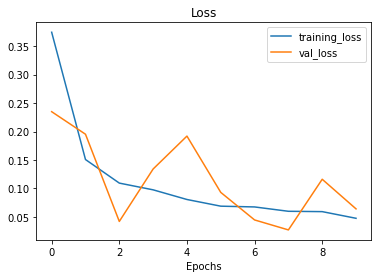

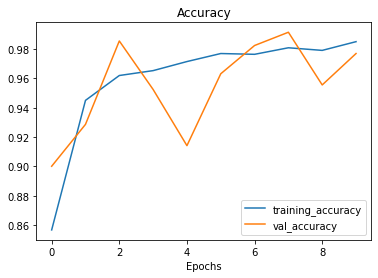

In [9]:
plot_loss_curves(history)

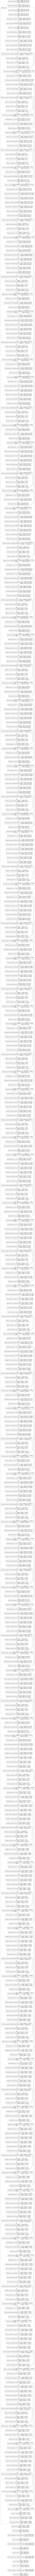

In [10]:
tf.keras.utils.plot_model(model, to_file='Efficientnetv2.png',expand_nested=True,show_shapes=True)

In [11]:
Accuracy['EfficientNet'] = history.history['accuracy'][-1]

In [12]:
Accuracy['EfficientNet']

0.9850187301635742

In [13]:
# Calculate the Loss and Accuracy on the Validation Data
test_loss, test_acc = model.evaluate(val_dataset)
print('test accuracy : ', test_acc)

132/132 [==============================] - 326s 2s/step - loss: 0.0641 - accuracy: 0.9769
test accuracy :  0.9769322276115417


In [14]:
model.save('EfficientNetv2.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
